# Model Tests
Each model will be tested against other stocks in the list

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Data Preprocessing

In [2]:
stock_dict = {
    'MEG': [],
    'JGS': [],
    'BDO': [],
    'FGEN': [],
    'ICT': [],
    'ALI': [],
    'SMC': [],
    'TEL': [],
    'GLO': [],
    'BLOOM': [],
    'RLC': [],
    'MER': [],
    'AC': [],
    'PGOLD': [],
    'LTG': [],
    'MPI': [],
    'AP': [],
    'RRHI': [],
    'URC': [],
    'PSEI': []
}

In [3]:
for index, key in enumerate(stock_dict):
    # Loading of datasets to the dictionary of stocks
    # We will only use the closing prices, hence we set usecols to index:4
    data = np.genfromtxt(f'data/{key}.csv', delimiter=',', skip_header=1, usecols=4)

    # If PSEI, we cut the data (include only the test data)
    if key == 'PSEI':
        len_data = len(data)
        data = data[int(len_data*0.80):]
    stock_dict[key] = data

print(stock_dict)

{'MEG': array([2.3408, 2.3145, 2.2882, ..., 2.37  , 2.31  , 2.34  ]), 'JGS': array([ 7.6149,  7.695 ,  7.695 , ..., 54.    , 53.6   , 53.9   ]), 'BDO': array([ 17.8868,  17.8868,  17.8868, ..., 126.    , 125.    , 125.5   ]), 'FGEN': array([19.5961, 19.8114, 19.8114, ..., 18.1   , 18.18  , 18.02  ]), 'ICT': array([  4.9185,   4.9185,   4.6815, ..., 212.    , 211.4   , 214.    ]), 'ALI': array([ 6.9136,  6.9136,  9.3827, ..., 29.2   , 29.1   , 29.25  ]), 'SMC': array([ 45.8774,  45.8774,  43.9855, ..., 112.7   , 110.    , 107.5   ]), 'TEL': array([ 827.5,  827.5,  700. , ..., 1395. , 1380. , 1380. ]), 'GLO': array([ 749.8907,  759.6295,  740.1518, ..., 2090.    , 2080.    ,
       2016.    ]), 'BLOOM': array([0.72, 0.7 , 0.9 , ..., 9.4 , 9.44, 9.45]), 'RLC': array([ 2.9573,  2.9957,  3.3029, ..., 16.42  , 16.3   , 16.14  ]), 'MER': array([ 95.9033,  95.1712,  97.3675, ..., 294.    , 283.    , 315.    ]), 'AC': array([198.2492, 195.6745, 205.9732, ..., 714.    , 700.    , 700.    ]), 'PG

In [4]:
stock_symbols = [keys for index,keys in enumerate(stock_dict)]
print(stock_symbols)

['MEG', 'JGS', 'BDO', 'FGEN', 'ICT', 'ALI', 'SMC', 'TEL', 'GLO', 'BLOOM', 'RLC', 'MER', 'AC', 'PGOLD', 'LTG', 'MPI', 'AP', 'RRHI', 'URC', 'PSEI']


In [5]:
# Creating a windowed datasets for training, using the following window sizes (5, 10, 15, 20)
windowed_sizes = [5, 10, 15, 20]
windowed_data = [0, 0, 0, 0]

# Initialize index counter 
idx_counter = 0

# Loop through the different window sizes
X_stock_dict = stock_dict.copy()
idx_counter = 0
for stock in stock_symbols:
    len_data = X_stock_dict[stock].shape[0]
    for window_size in windowed_sizes:
        train_data = np.zeros((len_data - window_size, window_size))
        for i in range(len_data - window_size):
            train_data[i] = X_stock_dict[stock][i:i + window_size]
        windowed_data[idx_counter] = train_data
        idx_counter += 1

    X_stock_dict[stock] = windowed_data
    # Reset windowed_data and idx_counter
    windowed_data = [0, 0, 0, 0]
    idx_counter = 0

print(X_stock_dict)

{'MEG': [array([[2.3408, 2.3145, 2.2882, 2.3145, 2.3145],
       [2.3145, 2.2882, 2.3145, 2.3145, 2.3145],
       [2.2882, 2.3145, 2.3145, 2.3145, 2.2882],
       ...,
       [2.21  , 2.23  , 2.26  , 2.32  , 2.3   ],
       [2.23  , 2.26  , 2.32  , 2.3   , 2.37  ],
       [2.26  , 2.32  , 2.3   , 2.37  , 2.31  ]]), array([[2.3408, 2.3145, 2.2882, ..., 2.2882, 2.2882, 2.2882],
       [2.3145, 2.2882, 2.3145, ..., 2.2882, 2.2882, 2.2882],
       [2.2882, 2.3145, 2.3145, ..., 2.2882, 2.2882, 1.8673],
       ...,
       [2.22  , 2.25  , 2.25  , ..., 2.26  , 2.32  , 2.3   ],
       [2.25  , 2.25  , 2.12  , ..., 2.32  , 2.3   , 2.37  ],
       [2.25  , 2.12  , 2.12  , ..., 2.3   , 2.37  , 2.31  ]]), array([[2.3408, 2.3145, 2.2882, ..., 1.578 , 1.7884, 1.9199],
       [2.3145, 2.2882, 2.3145, ..., 1.7884, 1.9199, 1.841 ],
       [2.2882, 2.3145, 2.3145, ..., 1.9199, 1.841 , 1.7884],
       ...,
       [2.16  , 2.12  , 2.13  , ..., 2.26  , 2.32  , 2.3   ],
       [2.12  , 2.13  , 2.13  , ..., 

## Predicting each stocks for every model

211/211 [==============================] - 0s 805us/step


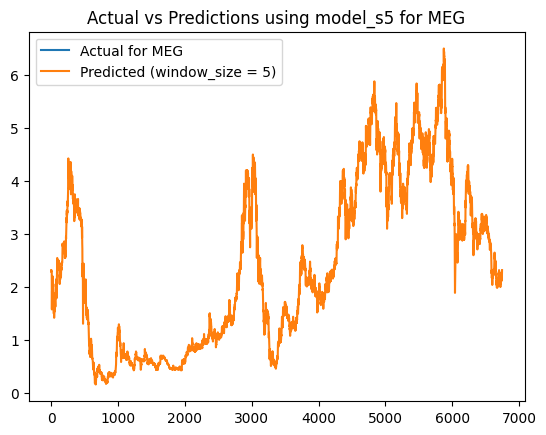

204/204 [==============================] - 0s 865us/step


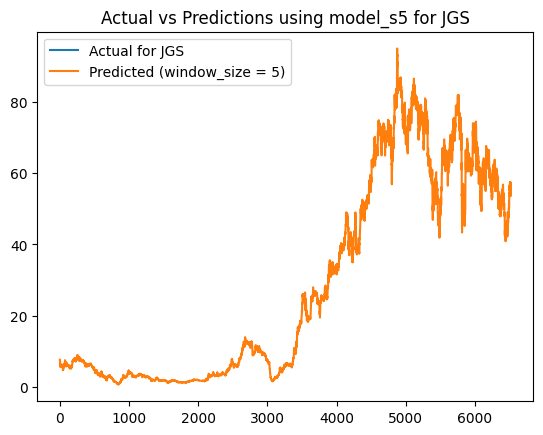

158/158 [==============================] - 0s 817us/step


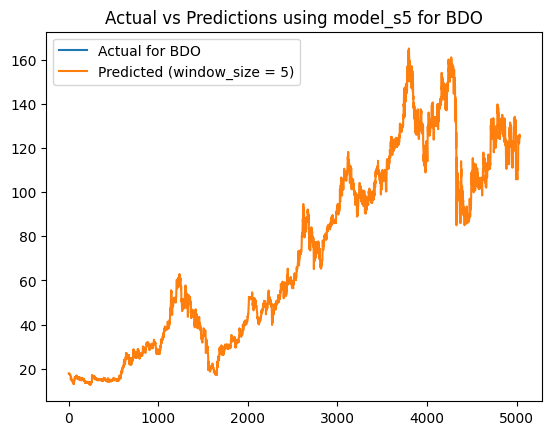

130/130 [==============================] - 0s 810us/step


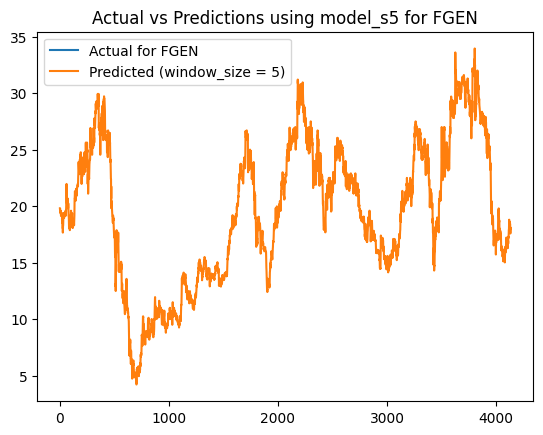

213/213 [==============================] - 0s 1ms/step


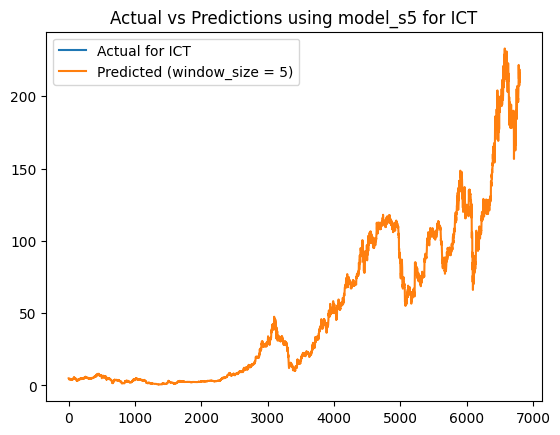

212/212 [==============================] - 0s 1ms/step


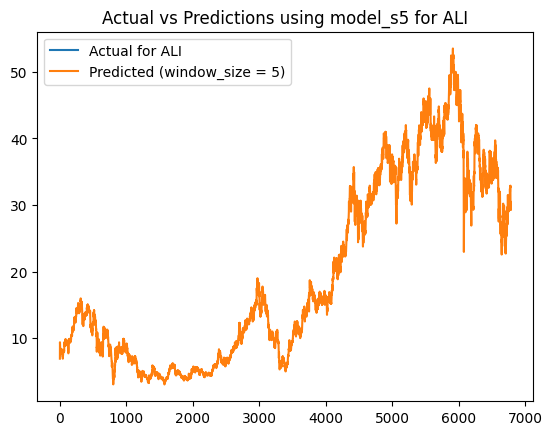

213/213 [==============================] - 0s 935us/step


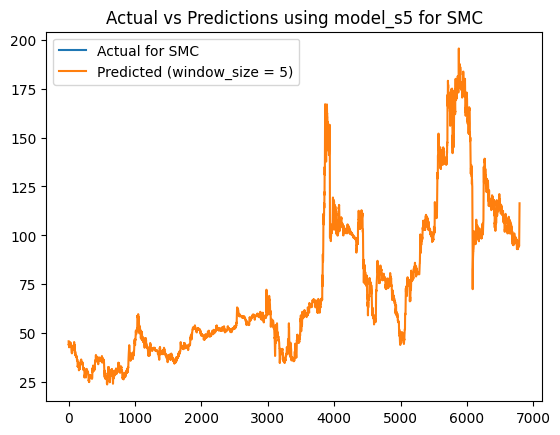

213/213 [==============================] - 0s 1ms/step


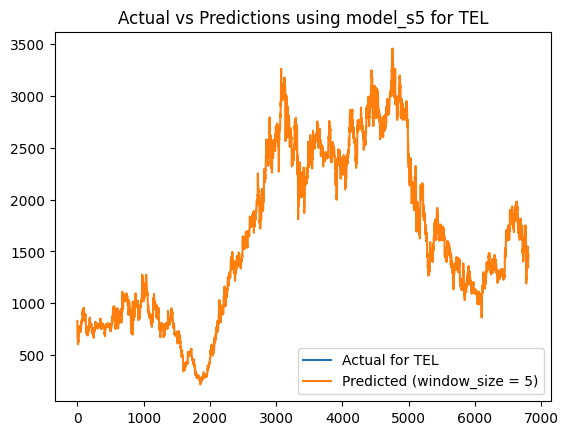

210/210 [==============================] - 0s 796us/step


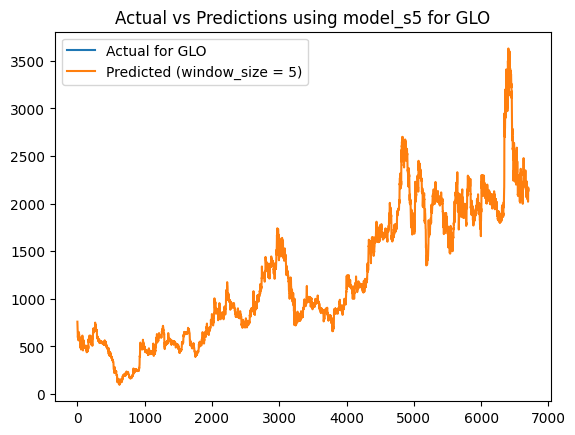

95/95 [==============================] - 0s 2ms/step


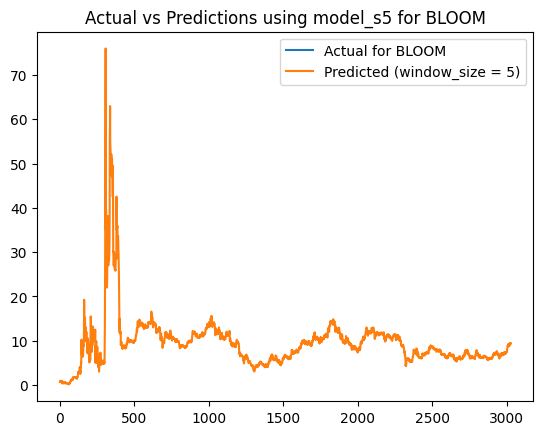

184/184 [==============================] - 0s 862us/step


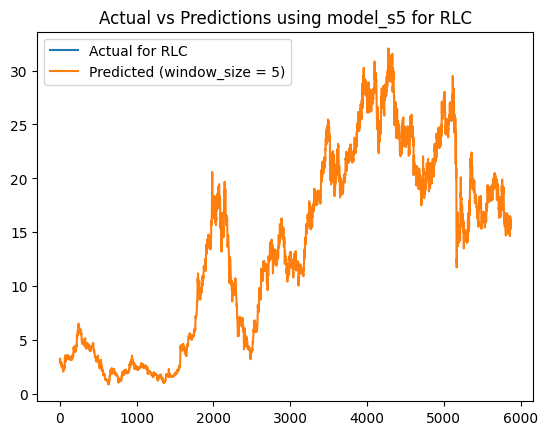

213/213 [==============================] - 0s 940us/step


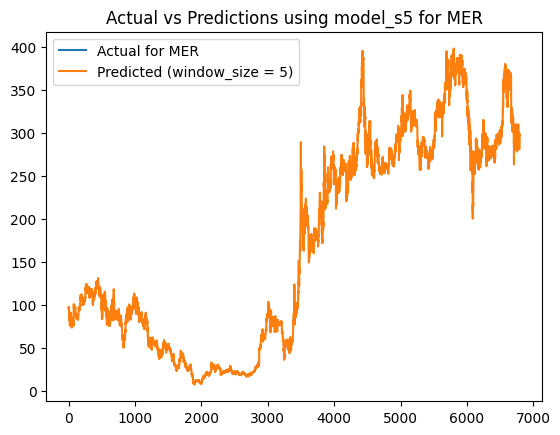

213/213 [==============================] - 0s 971us/step


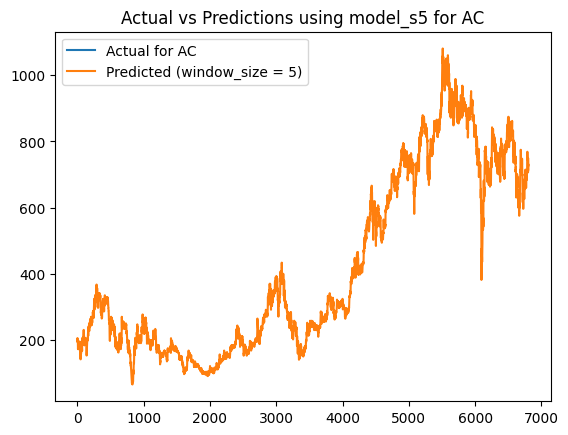

87/87 [==============================] - 0s 2ms/step


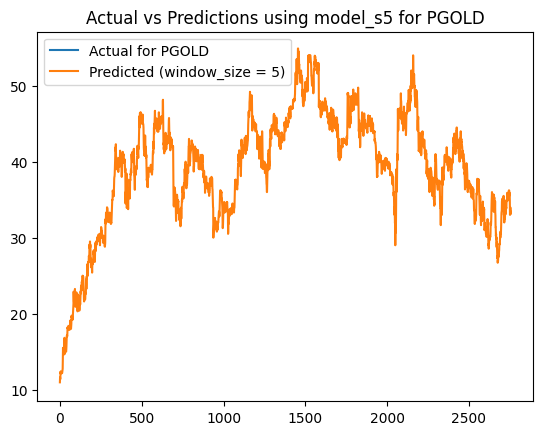

118/118 [==============================] - 0s 806us/step


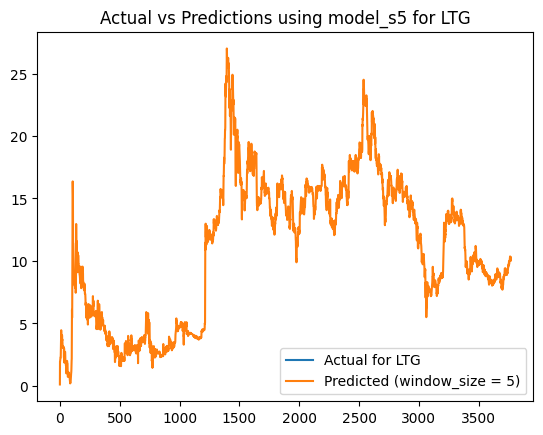

122/122 [==============================] - 0s 1ms/step


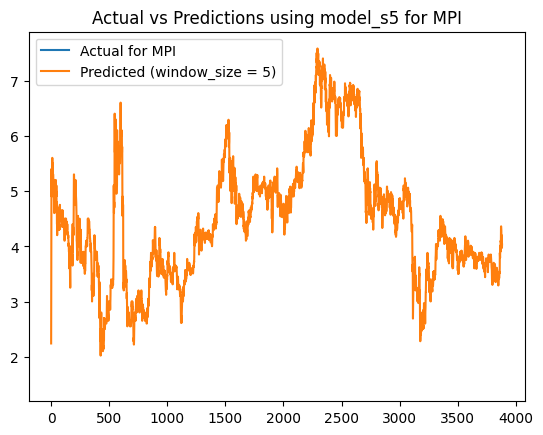

119/119 [==============================] - 0s 890us/step


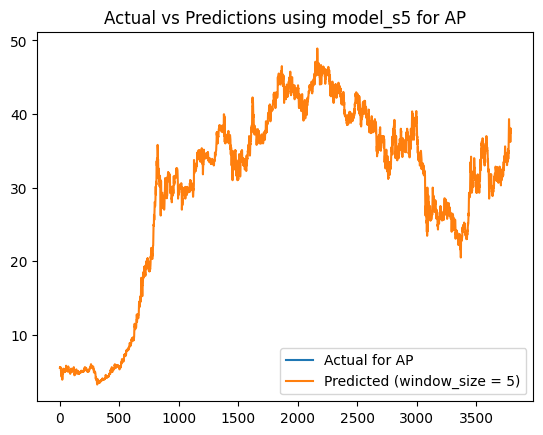

71/71 [==============================] - 0s 2ms/step


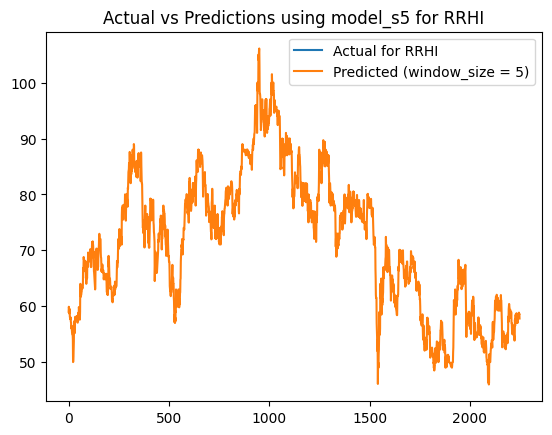

192/192 [==============================] - 0s 1ms/step


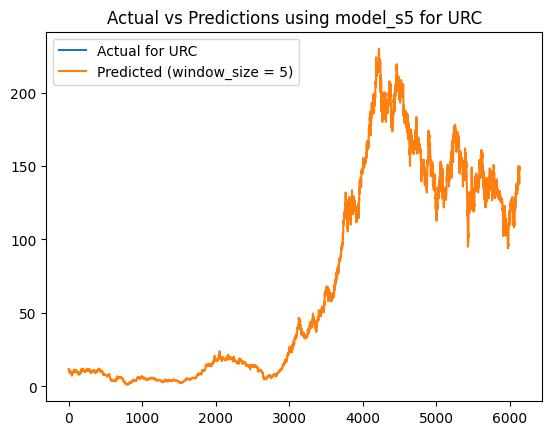

36/36 [==============================] - 0s 924us/step


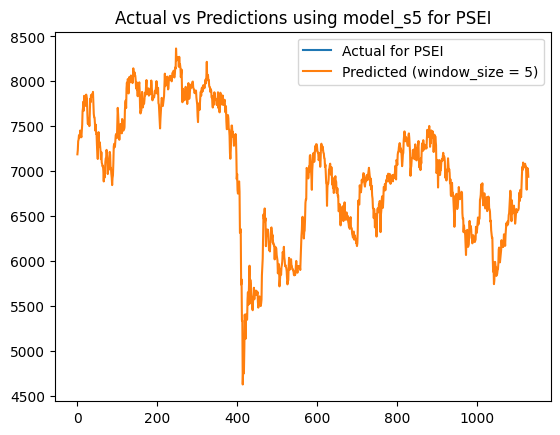

MSE        RMSE         MAE      MAPE
MEG        0.018316    0.135336    0.089568  0.044411
JGS        2.768997    1.664030    0.909225  0.039754
BDO        9.437371    3.072030    1.917598  0.027811
FGEN       0.697390    0.835099    0.589689  0.032449
ICT        8.046283    2.836597    1.446341  0.037207
ALI        0.888378    0.942538    0.612138  0.036234
SMC        9.741641    3.121160    1.633596  0.022560
TEL     4258.850672   65.259870   44.221286  0.029942
GLO     3485.954319   59.041971   36.287456  0.031104
BLOOM      6.424741    2.534707    0.707406  0.068108
RLC        0.474353    0.688733    0.446334  0.039573
MER       57.848920    7.605848    4.772926  0.037546
AC       334.596086   18.291968   12.152423  0.033886
PGOLD      2.051151    1.432184    1.053508  0.028002
LTG        0.579147    0.761017    0.456835  0.057332
MPI        0.045508    0.213325    0.142975  0.033738
AP         0.869306    0.932366    0.659025  0.025030
RRHI       6.239762    2.497952    1.873154  0.026765
URC       12.778722    3.574734    2.020836  0.037336
PSEI   31669.602701  177.959554  128.609522  0.019111

In [6]:
# Load the model_s5
model = tf.keras.models.load_model('exported_models/model_s5.keras')

# Initialize pandas dataframe for model_s5
len_symbols = len(stock_symbols)
df_model_s5 = pd.DataFrame({
    'MSE': [0 for _ in range(len_symbols)],
    'RMSE': [0 for _ in range(len_symbols)],
    'MAE': [0 for _ in range(len_symbols)],
    'MAPE': [0 for _ in range(len_symbols)]
}, index=[stock for stock in stock_symbols])

# Predict for all stocks using model_s5
for stock in stock_symbols:
    predictions = model.predict(X_stock_dict[stock][0])
    # Plot each one
    plt.plot(stock_dict[stock][0], label=f'Actual for {stock}')
    plt.plot(predictions, label='Predicted (window_size = 5)')
    plt.title(f"Actual vs Predictions using model_s5 for {stock}")
    plt.legend()
    plt.show()

    len_predictions = len(predictions)
    df_model_s5.loc[stock, 'MSE'] = mean_squared_error(stock_dict[stock][5:], predictions)
    df_model_s5.loc[stock, 'RMSE'] = sqrt(mean_squared_error(stock_dict[stock][5:], predictions))
    df_model_s5.loc[stock, 'MAE']= mean_absolute_error(stock_dict[stock][5:], predictions)
    df_model_s5.loc[stock, 'MAPE'] = mean_absolute_percentage_error(stock_dict[stock][5:], predictions)

df_model_s5

211/211 [==============================] - 0s 766us/step


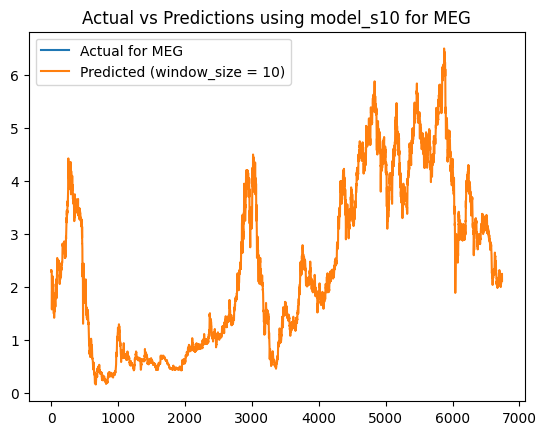

204/204 [==============================] - 0s 922us/step


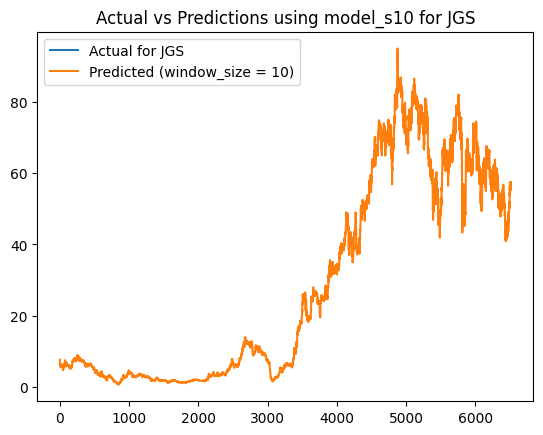

158/158 [==============================] - 0s 808us/step


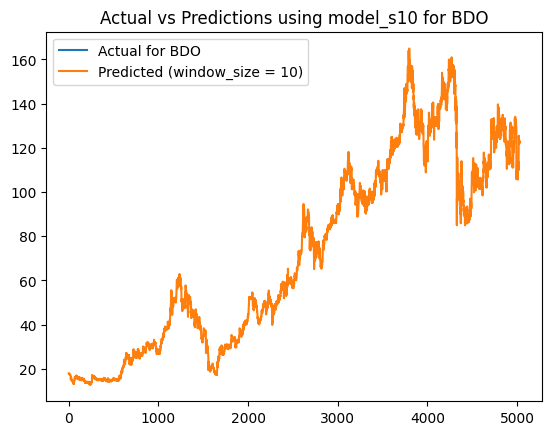

130/130 [==============================] - 0s 1ms/step


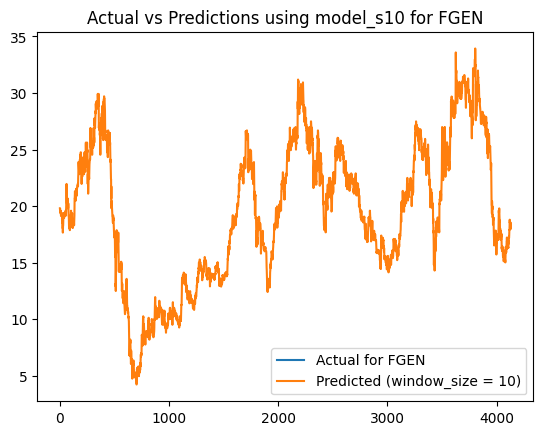

213/213 [==============================] - 0s 776us/step


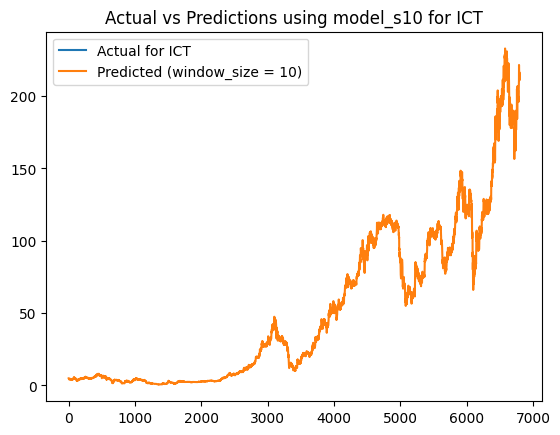

212/212 [==============================] - 0s 758us/step


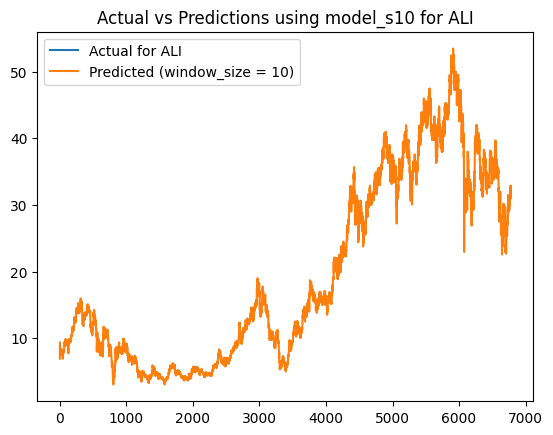

213/213 [==============================] - 0s 826us/step


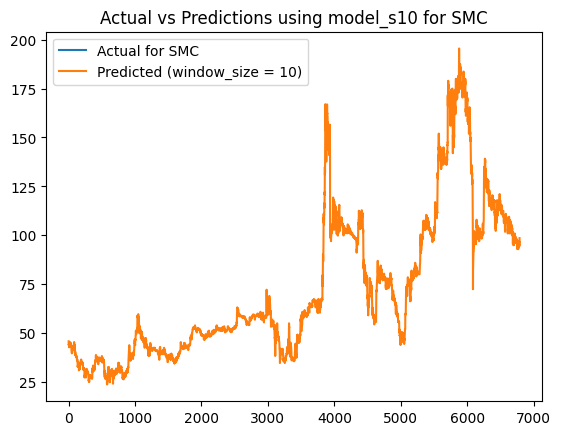

213/213 [==============================] - 0s 835us/step


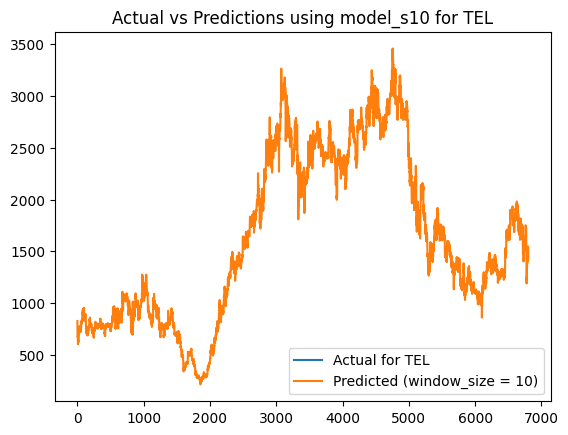

210/210 [==============================] - 0s 763us/step


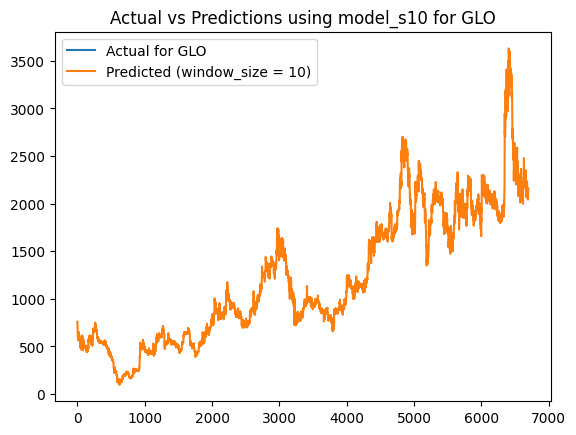

95/95 [==============================] - 0s 922us/step


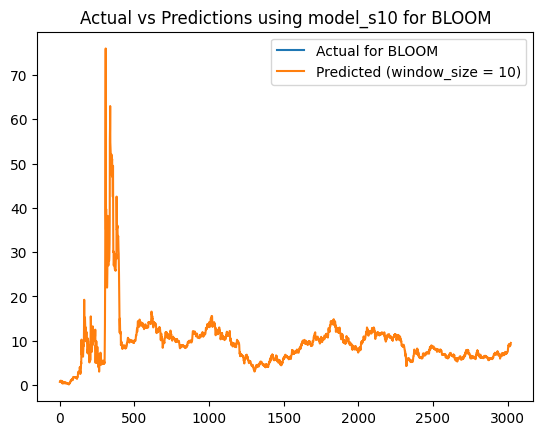

184/184 [==============================] - 0s 977us/step


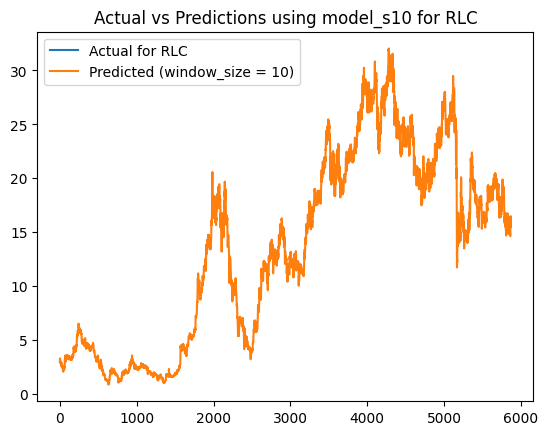

213/213 [==============================] - 0s 946us/step


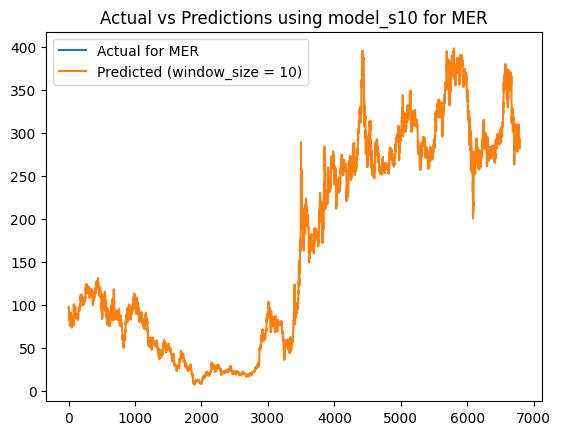

213/213 [==============================] - 0s 947us/step


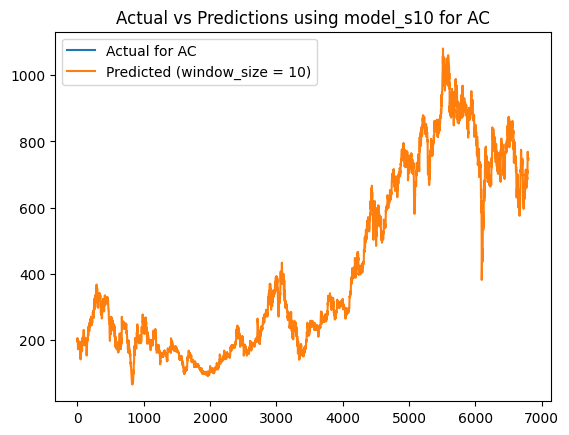

86/86 [==============================] - 0s 885us/step


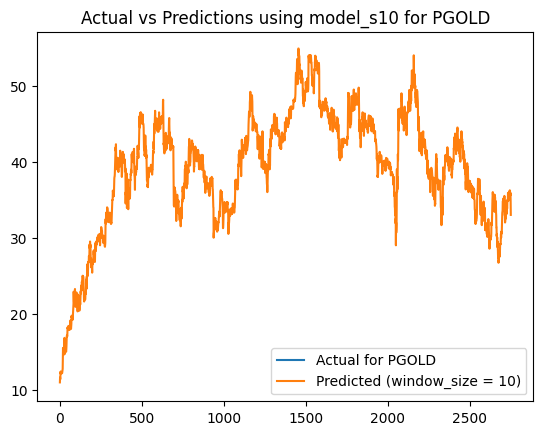

118/118 [==============================] - 0s 833us/step


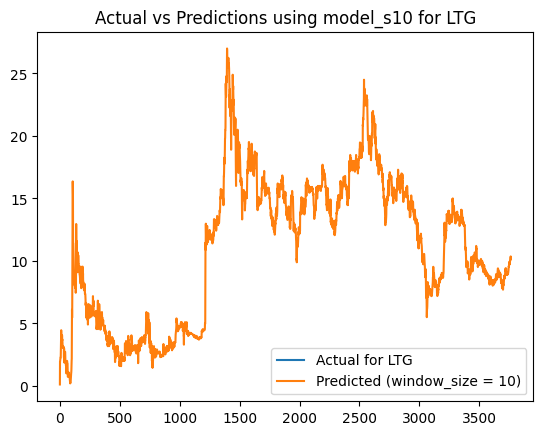

122/122 [==============================] - 0s 1ms/step


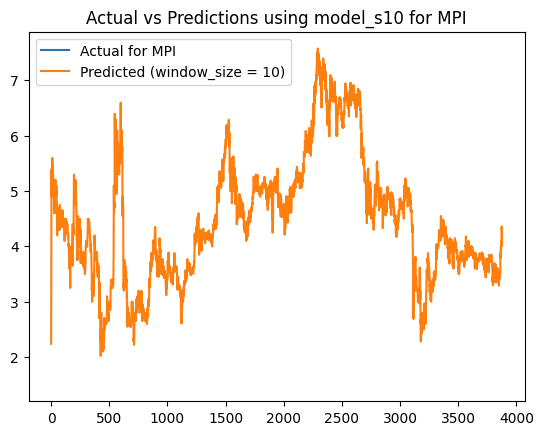

119/119 [==============================] - 0s 895us/step


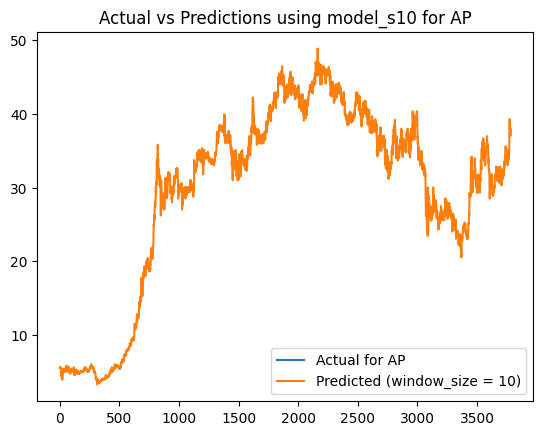

71/71 [==============================] - 0s 892us/step


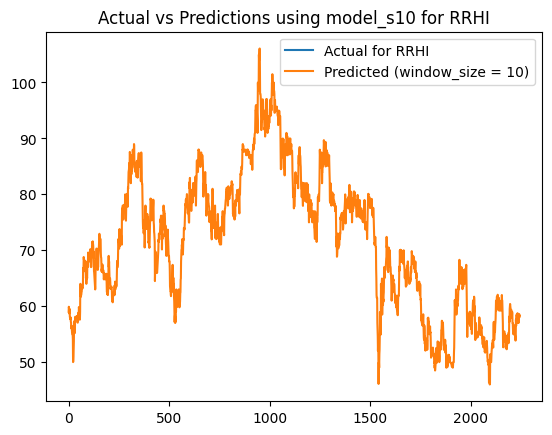

192/192 [==============================] - 0s 868us/step


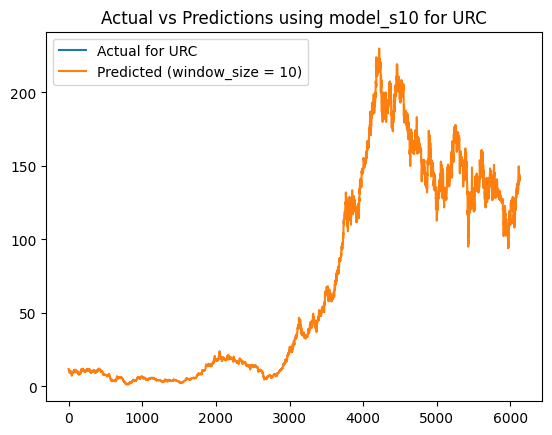

36/36 [==============================] - 0s 897us/step


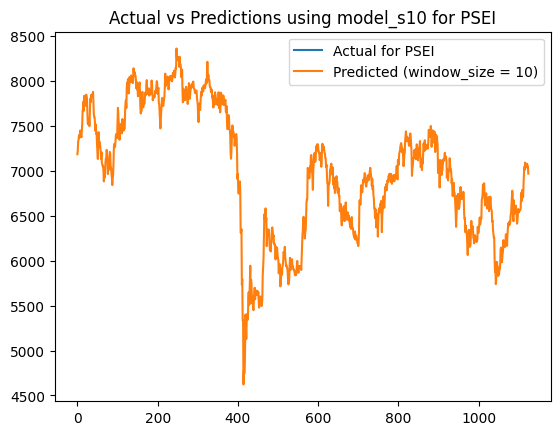

MSE        RMSE         MAE      MAPE
MEG        0.038769    0.196897    0.133206  0.067423
JGS        5.760891    2.400186    1.330831  0.061085
BDO       17.974881    4.239679    2.739470  0.040751
FGEN       1.468032    1.211624    0.885831  0.048855
ICT       14.818278    3.849452    2.039216  0.056821
ALI        1.740171    1.319156    0.868854  0.053035
SMC       22.632906    4.757405    2.556652  0.035653
TEL     8787.268237   93.740430   65.716627  0.044516
GLO     7241.296603   85.095808   54.263472  0.046971
BLOOM     12.545590    3.541975    1.085884  0.100728
RLC        0.962105    0.980870    0.641834  0.059406
MER      113.728864   10.664374    6.921557  0.055581
AC       660.492728   25.700053   17.460324  0.049369
PGOLD      4.221541    2.054639    1.532415  0.040884
LTG        1.341529    1.158244    0.702888  0.085659
MPI        0.092165    0.303587    0.207303  0.049395
AP         1.652444    1.285474    0.930371  0.036032
RRHI      12.912779    3.593436    2.717757  0.039186
URC       24.709837    4.970899    2.877585  0.057058
PSEI   75216.392033  274.256070  189.902790  0.028422

In [7]:
# Load the model_s10
model = tf.keras.models.load_model('exported_models/model_s10.keras')

# Initialize pandas dataframe for model_s10
len_symbols = len(stock_symbols)
df_model_s10 = pd.DataFrame({
    'MSE': [0 for _ in range(len_symbols)],
    'RMSE': [0 for _ in range(len_symbols)],
    'MAE': [0 for _ in range(len_symbols)],
    'MAPE': [0 for _ in range(len_symbols)]
}, index=[stock for stock in stock_symbols])

# Predict for all stocks using model_s10
for stock in stock_symbols:
    predictions = model.predict(X_stock_dict[stock][1])
    # Plot each one
    plt.plot(stock_dict[stock][0], label=f'Actual for {stock}')
    plt.plot(predictions, label='Predicted (window_size = 10)')
    plt.title(f"Actual vs Predictions using model_s10 for {stock}")
    plt.legend()
    plt.show()

    len_predictions = len(predictions)
    df_model_s10.loc[stock, 'MSE'] = mean_squared_error(stock_dict[stock][10:], predictions)
    df_model_s10.loc[stock, 'RMSE'] = sqrt(mean_squared_error(stock_dict[stock][10:], predictions))
    df_model_s10.loc[stock, 'MAE']= mean_absolute_error(stock_dict[stock][10:], predictions)
    df_model_s10.loc[stock, 'MAPE'] = mean_absolute_percentage_error(stock_dict[stock][10:], predictions)

df_model_s10

211/211 [==============================] - 0s 893us/step


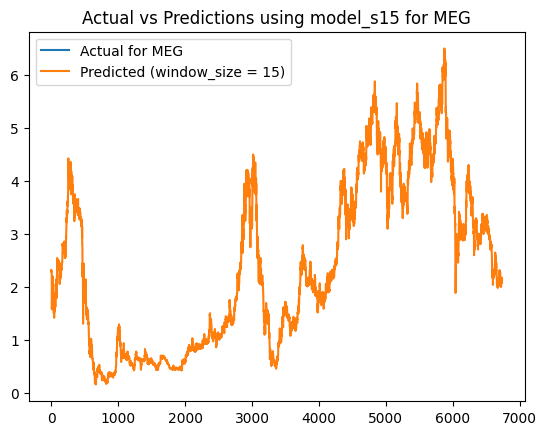

204/204 [==============================] - 0s 839us/step


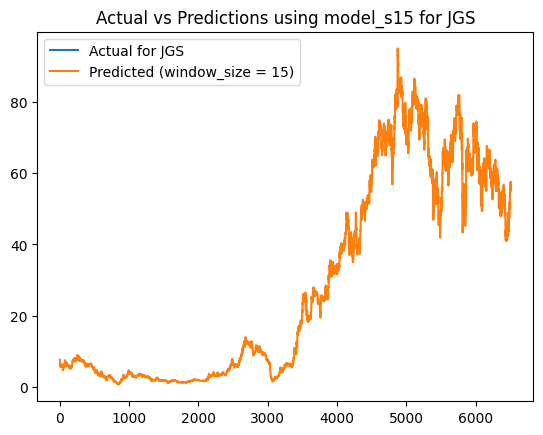

158/158 [==============================] - 0s 817us/step


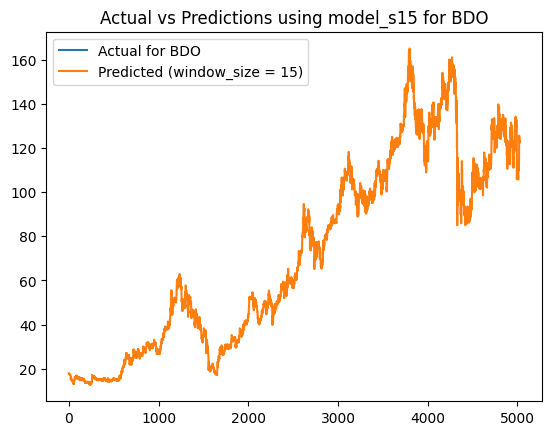

129/129 [==============================] - 0s 836us/step


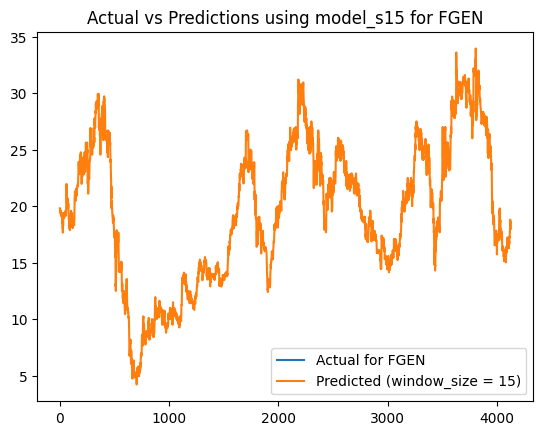

213/213 [==============================] - 0s 785us/step


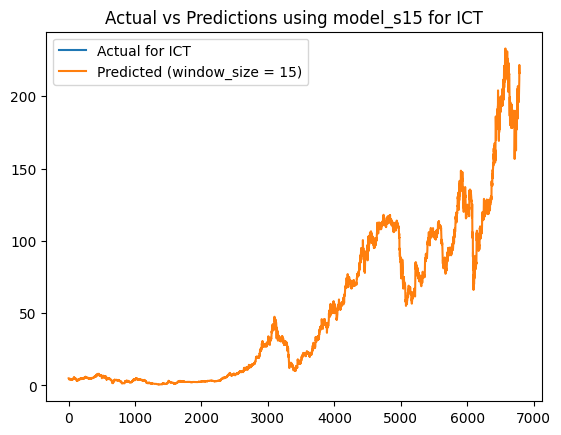

212/212 [==============================] - 0s 846us/step


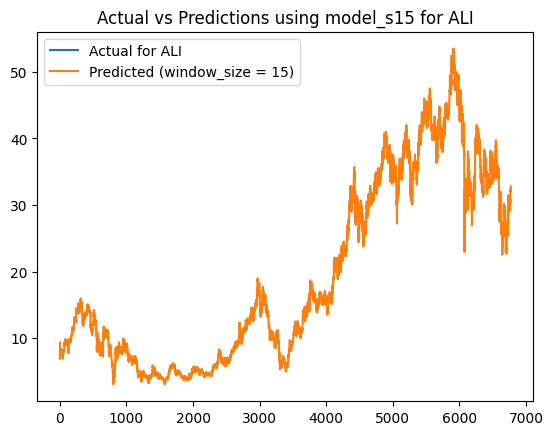

212/212 [==============================] - 0s 1ms/step


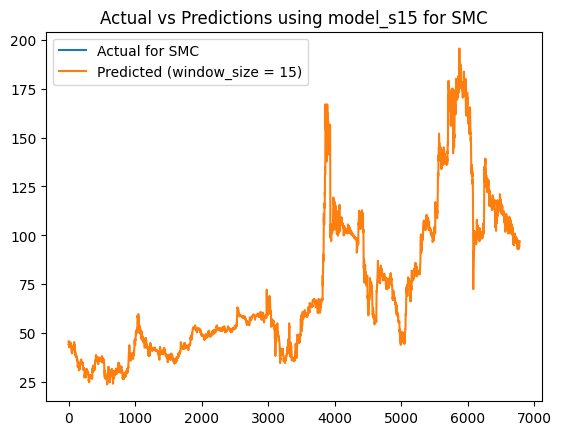

213/213 [==============================] - 0s 843us/step


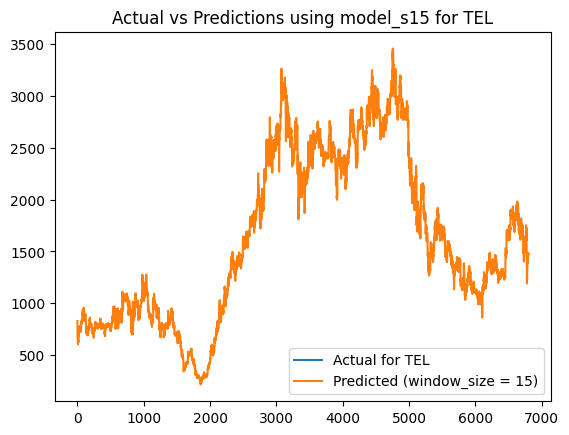

210/210 [==============================] - 0s 873us/step


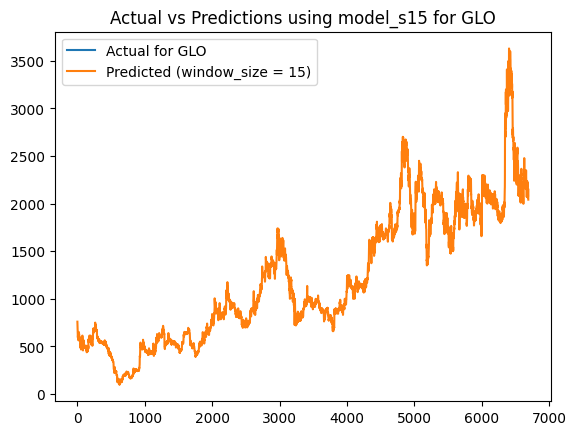

95/95 [==============================] - 0s 943us/step


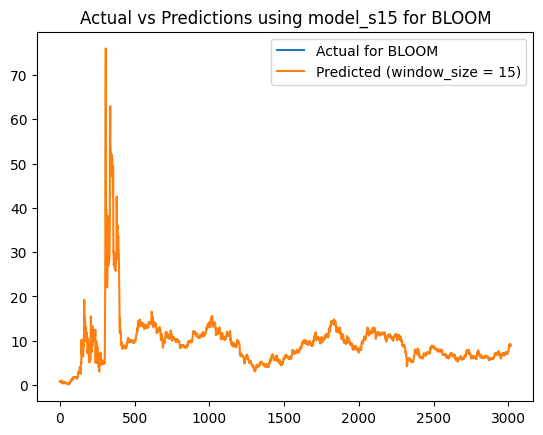

184/184 [==============================] - 0s 1ms/step


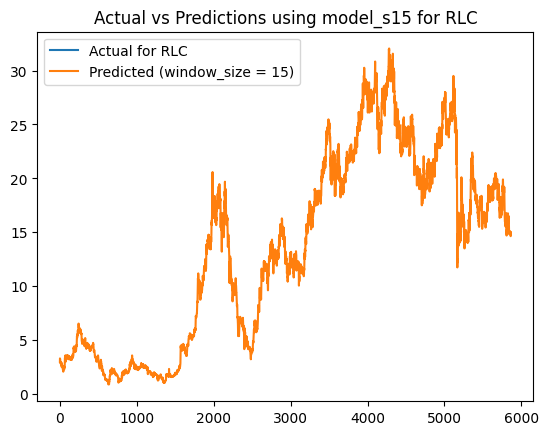

212/212 [==============================] - 0s 966us/step


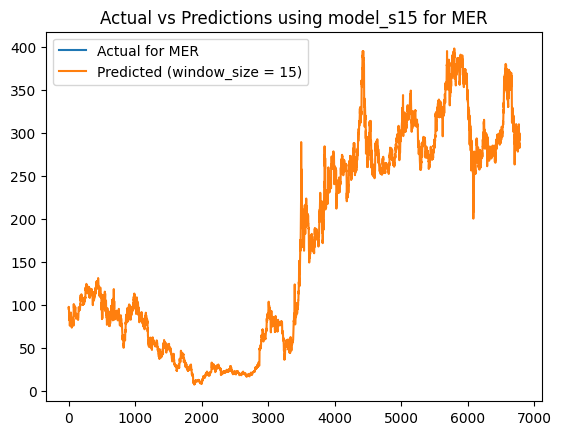

213/213 [==============================] - 0s 872us/step


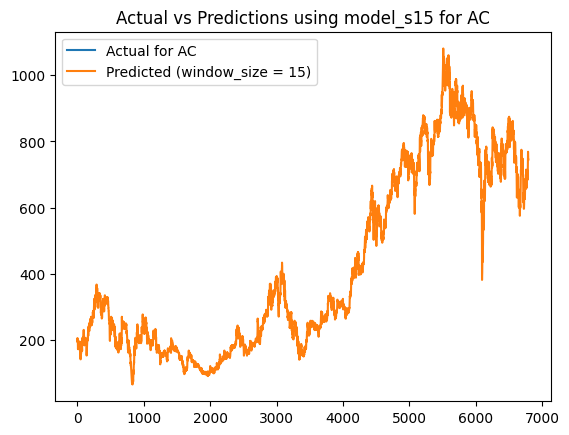

86/86 [==============================] - 0s 870us/step


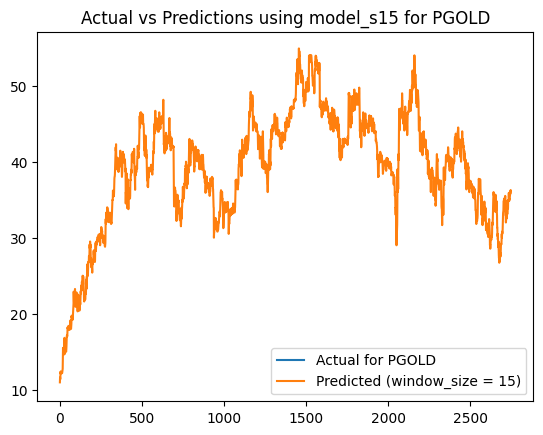

118/118 [==============================] - 0s 1ms/step


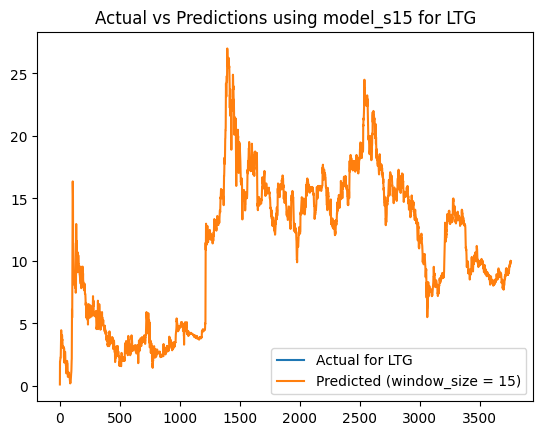

122/122 [==============================] - 0s 2ms/step


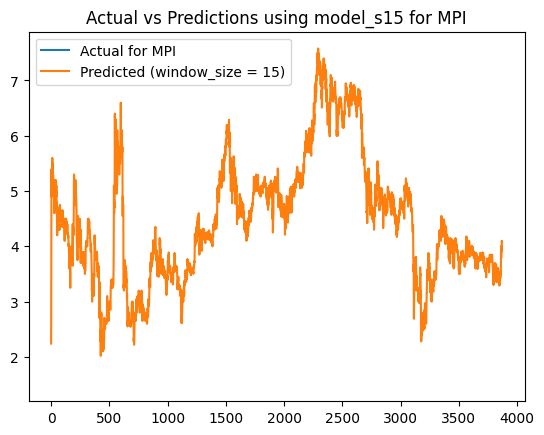

119/119 [==============================] - 0s 816us/step


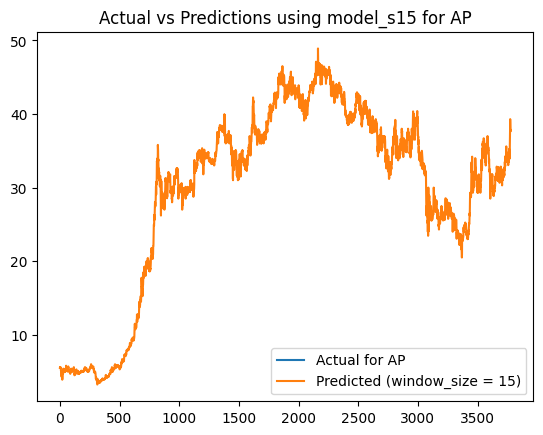

70/70 [==============================] - 0s 868us/step


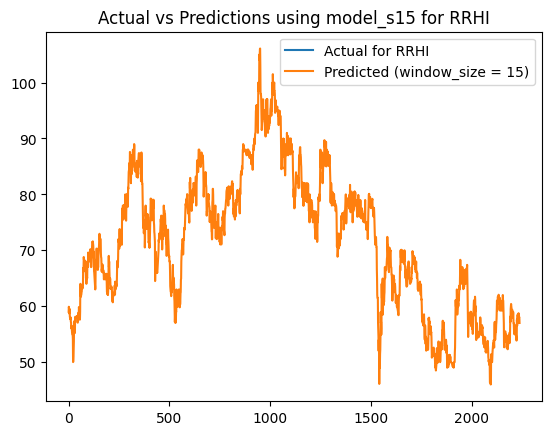

192/192 [==============================] - 0s 860us/step


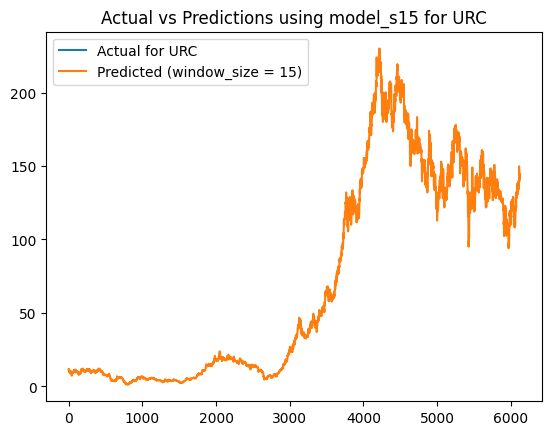

35/35 [==============================] - 0s 1ms/step


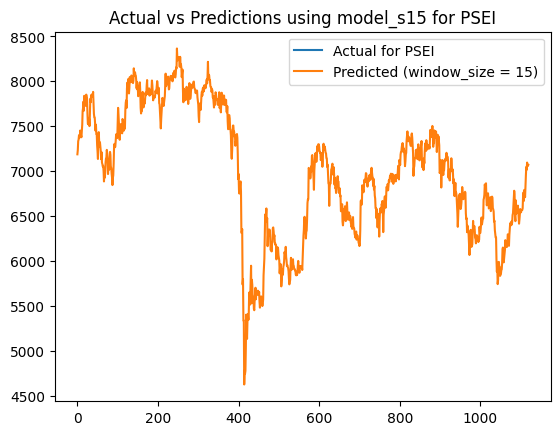

MSE        RMSE         MAE      MAPE
MEG         0.059735    0.244408    0.168174  0.086952
JGS         8.455402    2.907817    1.651278  0.078490
BDO        26.217391    5.120292    3.354860  0.050642
FGEN        2.224983    1.491638    1.118746  0.061843
ICT        22.667191    4.761007    2.540311  0.073216
ALI         2.529581    1.590466    1.077569  0.066549
SMC        36.532774    6.044235    3.295372  0.045754
TEL     12492.040622  111.767798   80.700129  0.055254
GLO     10635.612280  103.129105   65.904022  0.058306
BLOOM      15.622890    3.952580    1.360723  0.127756
RLC         1.414673    1.189400    0.795685  0.075225
MER       178.133854   13.346679    8.736360  0.070488
AC        980.478607   31.312595   21.475091  0.061491
PGOLD       6.424514    2.534662    1.906205  0.050806
LTG         2.051242    1.432216    0.879082  0.103832
MPI         0.137461    0.370758    0.253845  0.060713
AP          2.446770    1.564215    1.122810  0.043996
RRHI       18.935907    4.351541    3.322734  0.048185
URC        35.196956    5.932702    3.497430  0.072415
PSEI   120814.021537  347.583115  239.874961  0.036063

In [8]:
# Load the model_s15
model = tf.keras.models.load_model('exported_models/model_s15.keras')

# Initialize pandas dataframe for model_s15
len_symbols = len(stock_symbols)
df_model_s15 = pd.DataFrame({
    'MSE': [0 for _ in range(len_symbols)],
    'RMSE': [0 for _ in range(len_symbols)],
    'MAE': [0 for _ in range(len_symbols)],
    'MAPE': [0 for _ in range(len_symbols)]
}, index=[stock for stock in stock_symbols])

# Predict for all stocks using model_s15
for stock in stock_symbols:
    predictions = model.predict(X_stock_dict[stock][2])
    # Plot each one
    plt.plot(stock_dict[stock][0], label=f'Actual for {stock}')
    plt.plot(predictions, label='Predicted (window_size = 15)')
    plt.title(f"Actual vs Predictions using model_s15 for {stock}")
    plt.legend()
    plt.show()

    len_predictions = len(predictions)
    df_model_s15.loc[stock, 'MSE'] = mean_squared_error(stock_dict[stock][15:], predictions)
    df_model_s15.loc[stock, 'RMSE'] = sqrt(mean_squared_error(stock_dict[stock][15:], predictions))
    df_model_s15.loc[stock, 'MAE']= mean_absolute_error(stock_dict[stock][15:], predictions)
    df_model_s15.loc[stock, 'MAPE'] = mean_absolute_percentage_error(stock_dict[stock][15:], predictions)

df_model_s15

211/211 [==============================] - 0s 813us/step


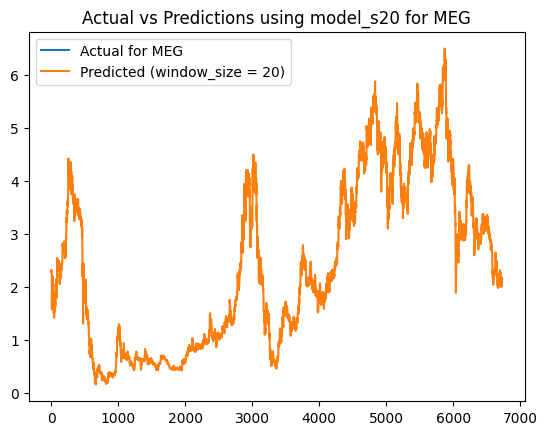

204/204 [==============================] - 0s 962us/step


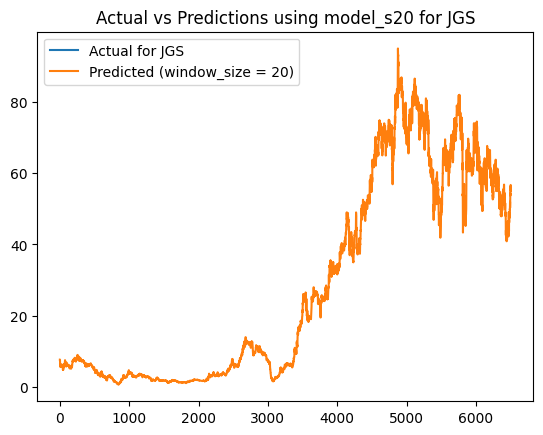

157/157 [==============================] - 0s 943us/step


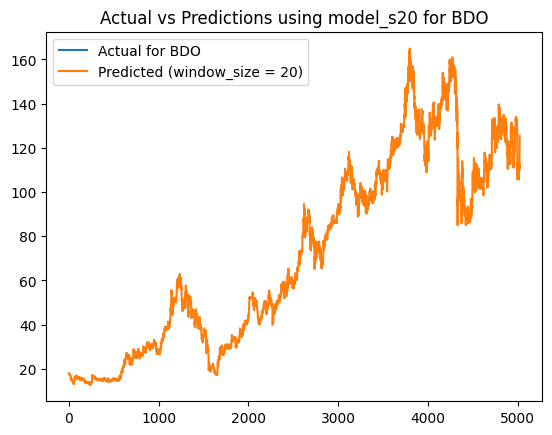

129/129 [==============================] - 0s 821us/step


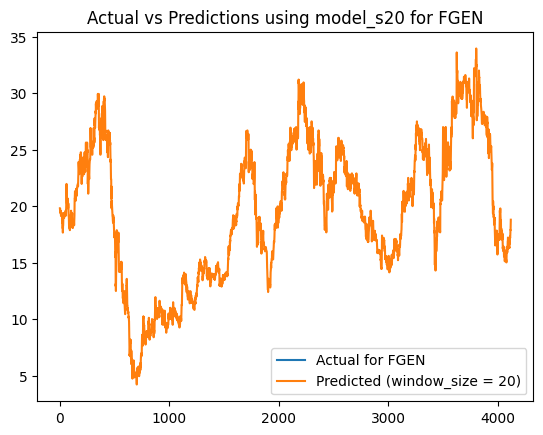

213/213 [==============================] - 0s 909us/step


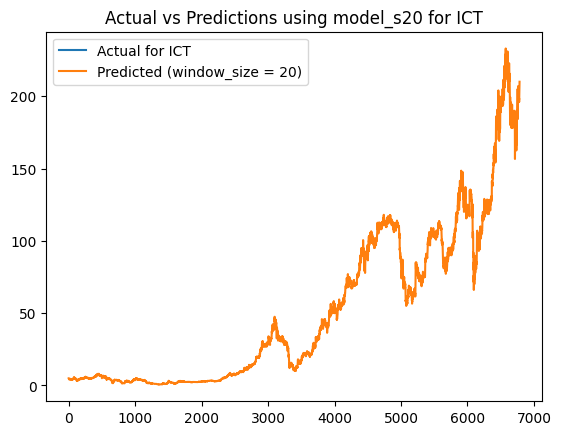

212/212 [==============================] - 0s 1ms/step


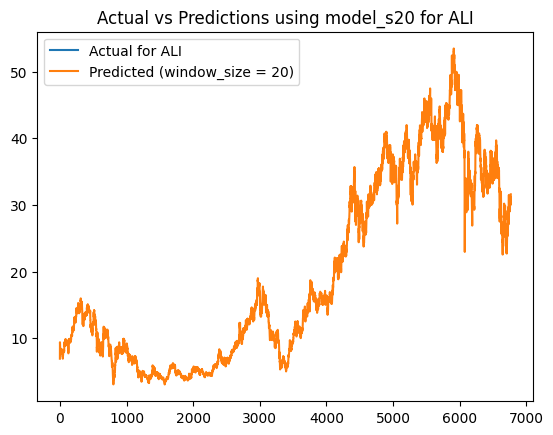

212/212 [==============================] - 0s 941us/step


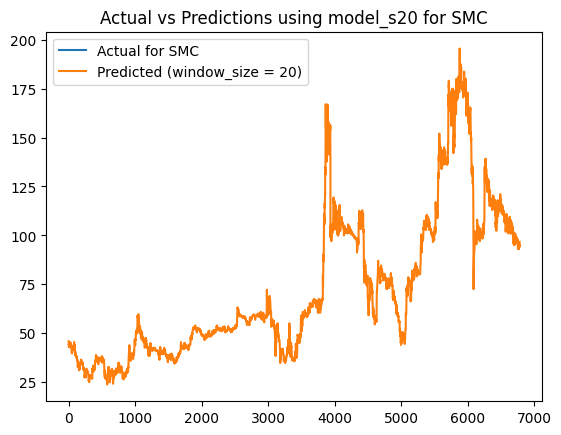

213/213 [==============================] - 0s 1ms/step


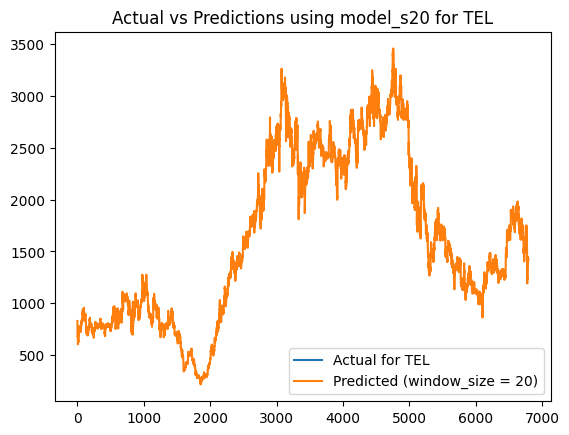

209/209 [==============================] - 0s 1ms/step


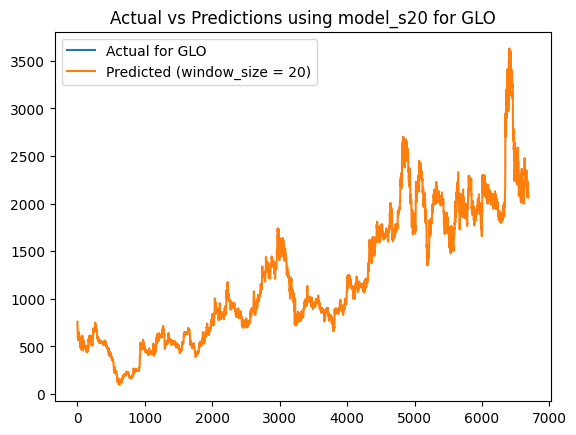

95/95 [==============================] - 0s 993us/step


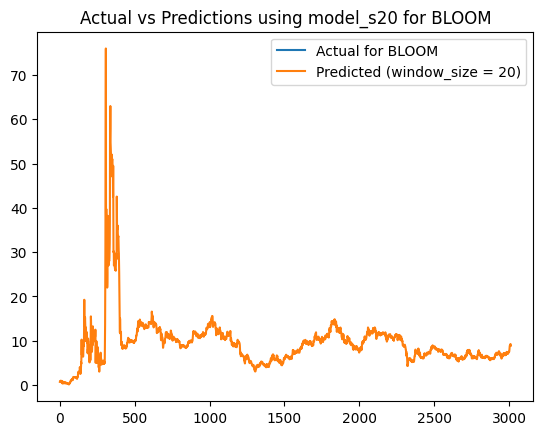

184/184 [==============================] - 0s 870us/step


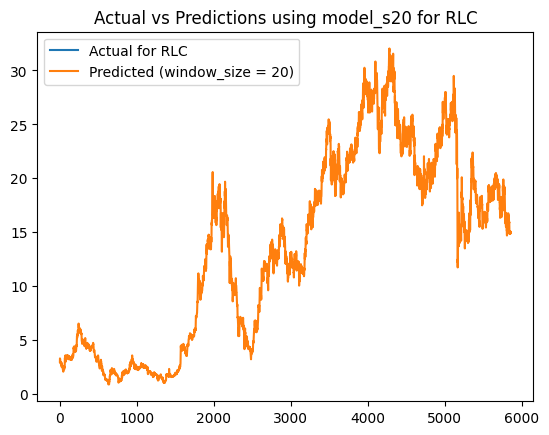

212/212 [==============================] - 0s 911us/step


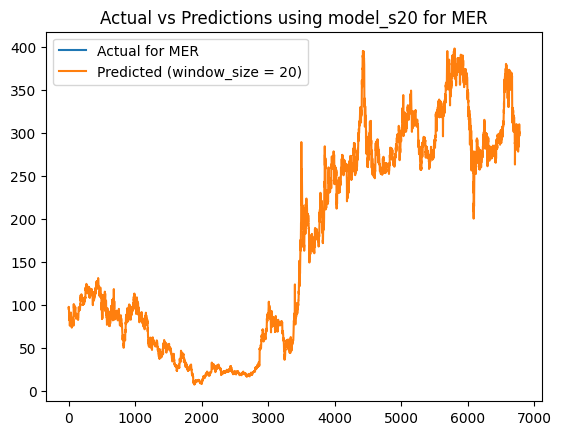

213/213 [==============================] - 0s 855us/step


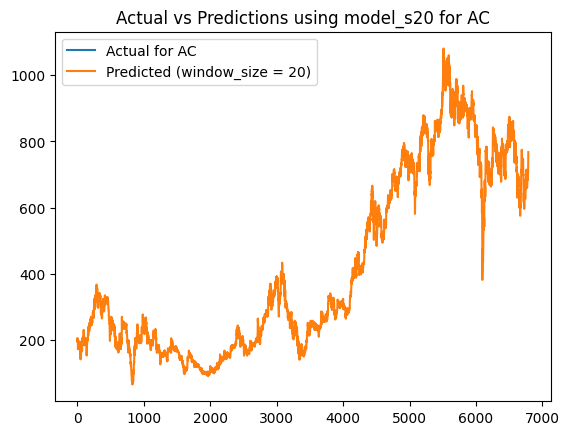

86/86 [==============================] - 0s 816us/step


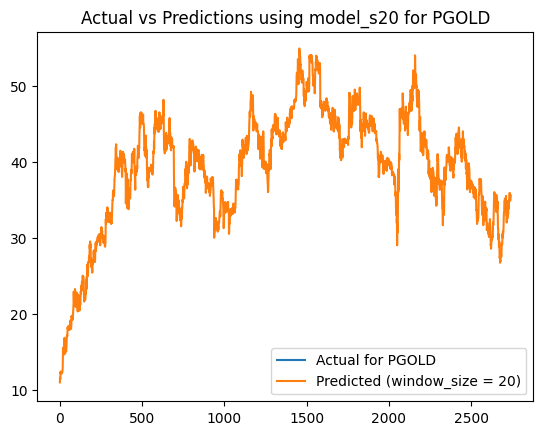

118/118 [==============================] - 0s 1ms/step


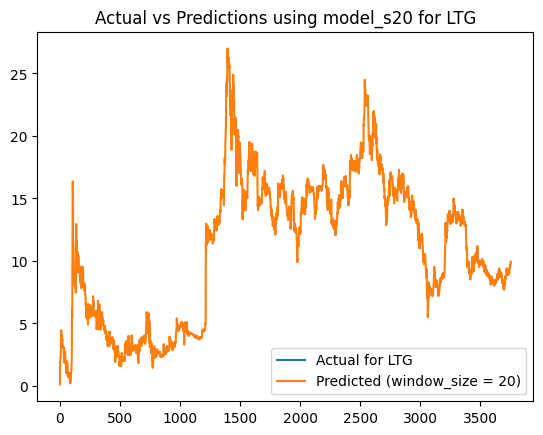

121/121 [==============================] - 0s 843us/step


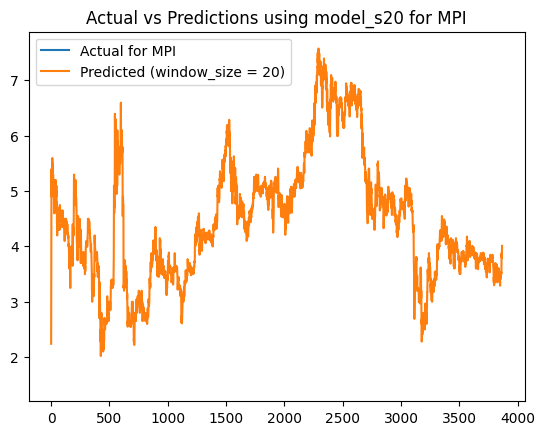

118/118 [==============================] - 0s 835us/step


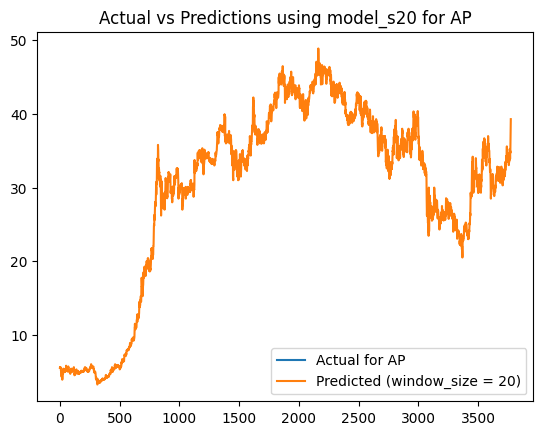

70/70 [==============================] - 0s 932us/step


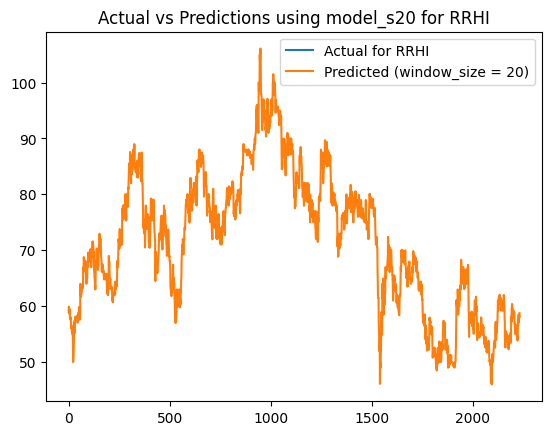

192/192 [==============================] - 0s 1ms/step


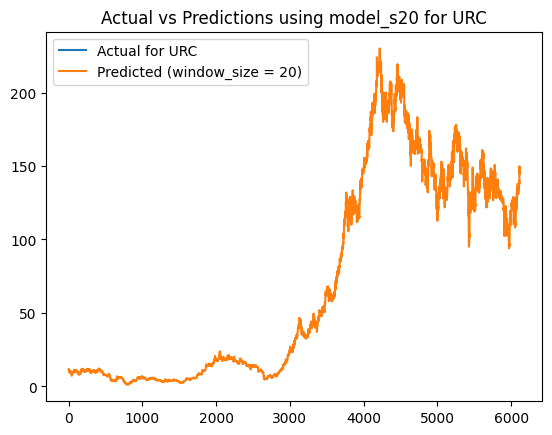

35/35 [==============================] - 0s 944us/step


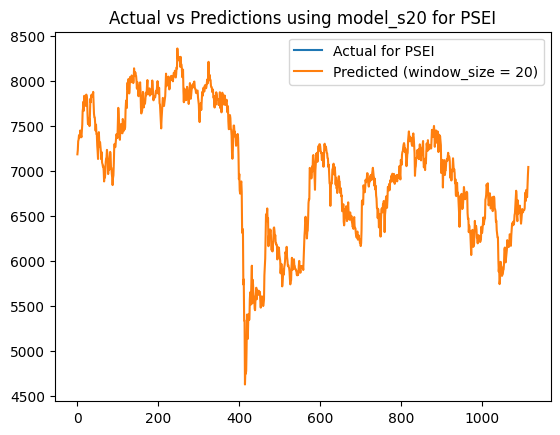

MSE        RMSE         MAE      MAPE
MEG         0.081945    0.286261    0.198889  0.104506
JGS        11.098233    3.331401    1.924922  0.094671
BDO        34.938892    5.910913    3.882163  0.059377
FGEN        2.972542    1.724106    1.310002  0.072760
ICT        31.083304    5.575240    3.015446  0.088186
ALI         3.312117    1.819922    1.258460  0.078192
SMC        50.545313    7.109523    3.941556  0.054503
TEL     16163.828299  127.137045   94.033980  0.065003
GLO     14494.254401  120.392086   76.687209  0.068678
BLOOM      20.589625    4.537579    1.647080  0.154736
RLC         1.896910    1.377283    0.934427  0.089275
MER       232.833686   15.258889   10.142754  0.082691
AC       1330.207968   36.472016   24.969215  0.072184
PGOLD       8.605570    2.933525    2.250195  0.059801
LTG         2.759059    1.661042    1.040521  0.120773
MPI         0.180567    0.424932    0.293620  0.070437
AP          3.217083    1.793623    1.286483  0.050678
RRHI       25.231990    5.023145    3.906988  0.056604
URC        46.026449    6.784280    4.096624  0.086947
PSEI   162395.822881  402.983651  280.754673  0.042359

In [9]:
# Load the model_s20
model = tf.keras.models.load_model('exported_models/model_s20.keras')

# Initialize pandas dataframe for model_s20
len_symbols = len(stock_symbols)
df_model_s20 = pd.DataFrame({
    'MSE': [0 for _ in range(len_symbols)],
    'RMSE': [0 for _ in range(len_symbols)],
    'MAE': [0 for _ in range(len_symbols)],
    'MAPE': [0 for _ in range(len_symbols)]
}, index=[stock for stock in stock_symbols])

# Predict for all stocks using model_s20
for stock in stock_symbols:
    predictions = model.predict(X_stock_dict[stock][3])
    # Plot each one
    plt.plot(stock_dict[stock][0], label=f'Actual for {stock}')
    plt.plot(predictions, label='Predicted (window_size = 20)')
    plt.title(f"Actual vs Predictions using model_s20 for {stock}")
    plt.legend()
    plt.show()

    len_predictions = len(predictions)
    df_model_s20.loc[stock, 'MSE'] = mean_squared_error(stock_dict[stock][20:], predictions)
    df_model_s20.loc[stock, 'RMSE'] = sqrt(mean_squared_error(stock_dict[stock][20:], predictions))
    df_model_s20.loc[stock, 'MAE']= mean_absolute_error(stock_dict[stock][20:], predictions)
    df_model_s20.loc[stock, 'MAPE'] = mean_absolute_percentage_error(stock_dict[stock][20:], predictions)

df_model_s20

211/211 [==============================] - 0s 886us/step


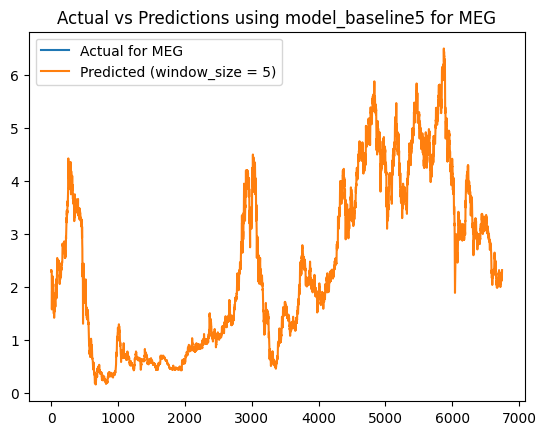

204/204 [==============================] - 0s 826us/step


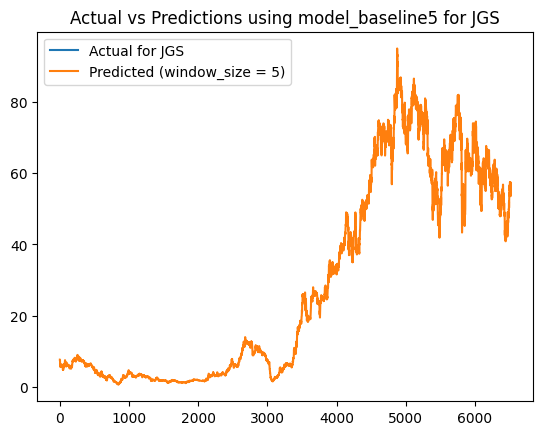

158/158 [==============================] - 0s 966us/step


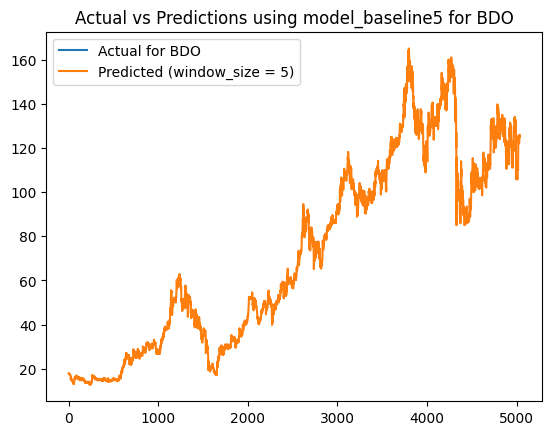

130/130 [==============================] - 0s 847us/step


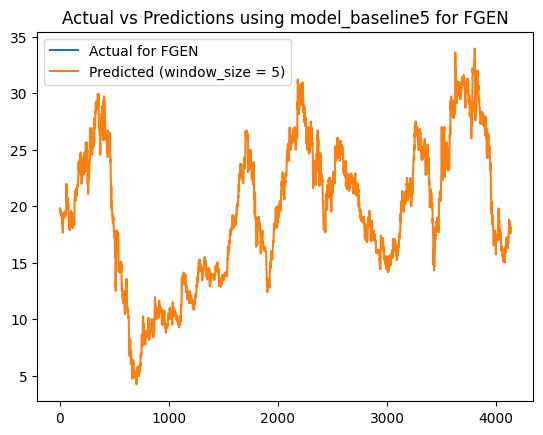

213/213 [==============================] - 0s 892us/step


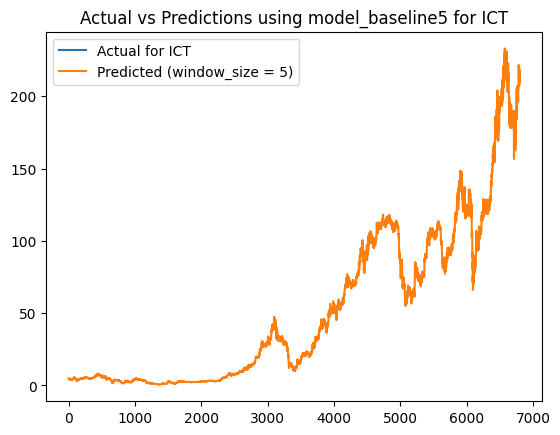

212/212 [==============================] - 0s 1ms/step


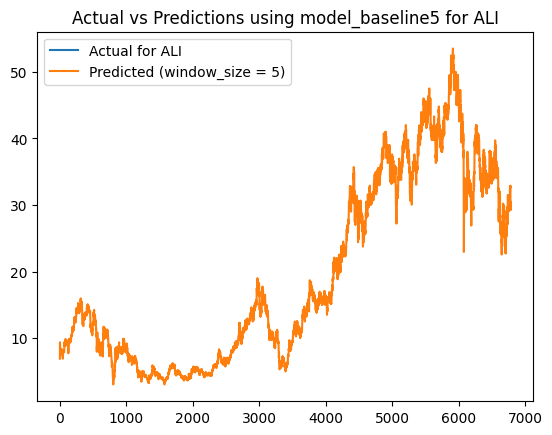

213/213 [==============================] - 0s 1ms/step


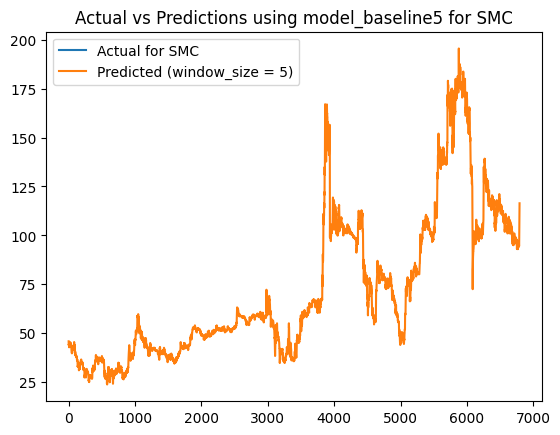

213/213 [==============================] - 0s 866us/step


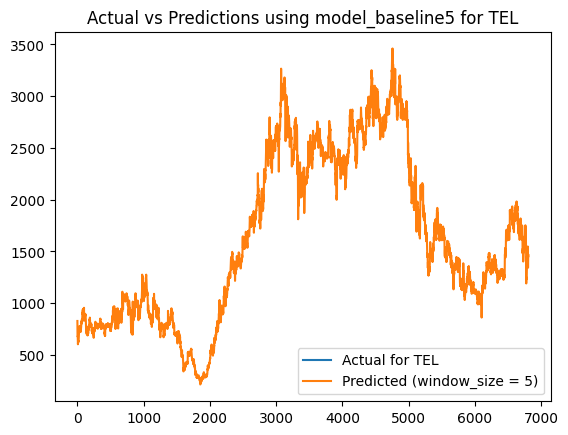

210/210 [==============================] - 0s 1ms/step


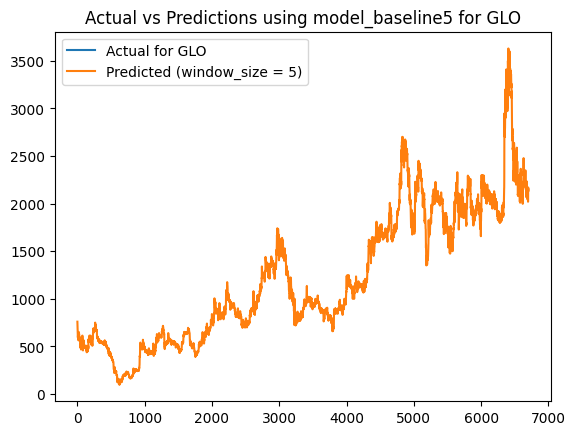

95/95 [==============================] - 0s 895us/step


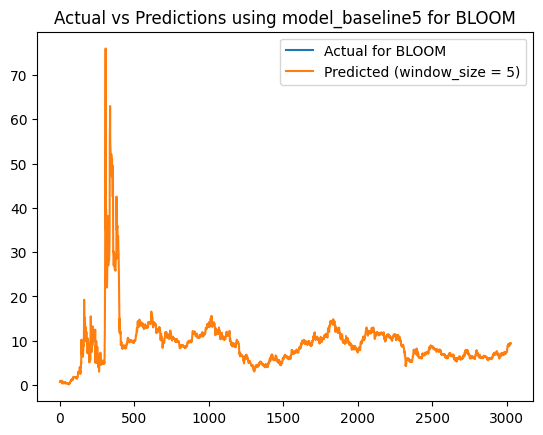

184/184 [==============================] - 0s 1ms/step


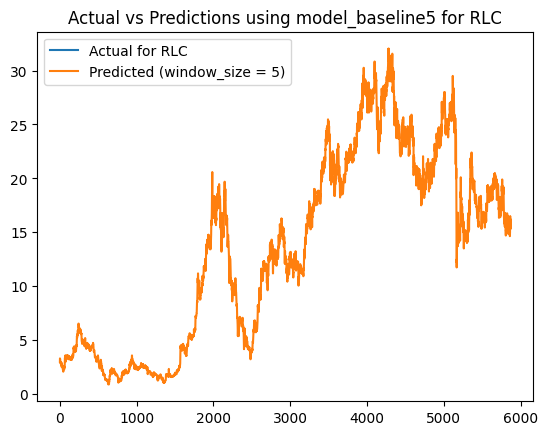

213/213 [==============================] - 0s 836us/step


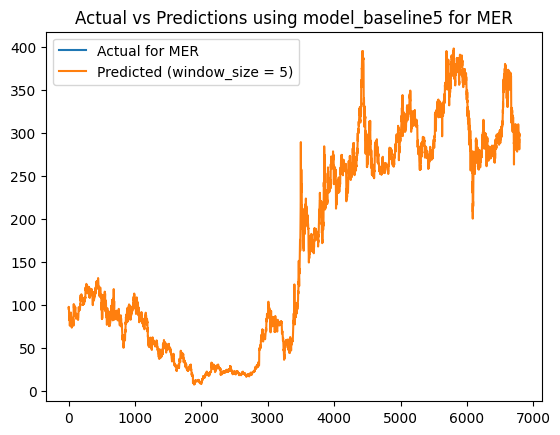

213/213 [==============================] - 0s 848us/step


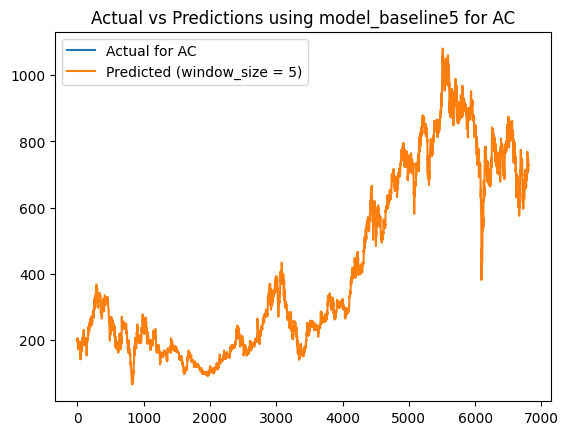

87/87 [==============================] - 0s 844us/step


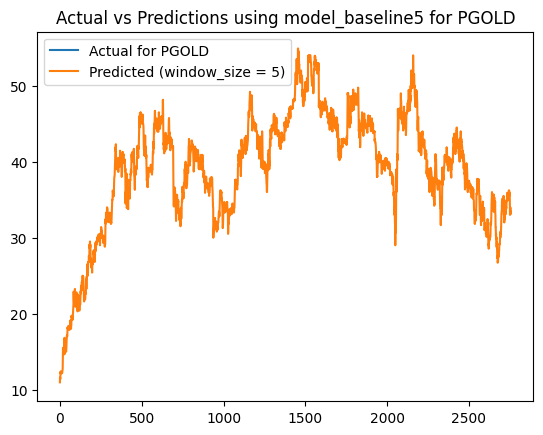

118/118 [==============================] - 0s 827us/step


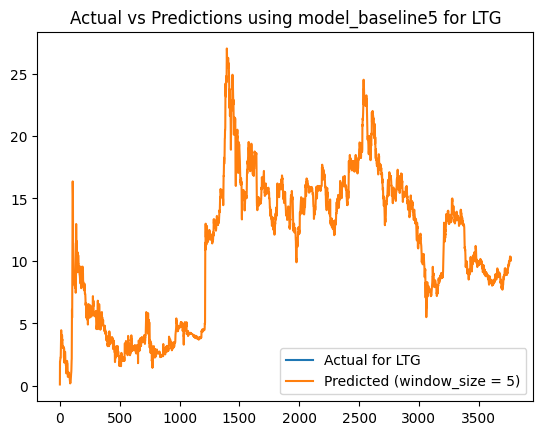

122/122 [==============================] - 0s 924us/step


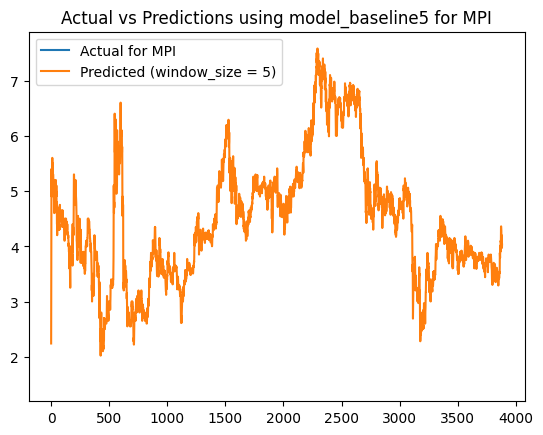

119/119 [==============================] - 0s 833us/step


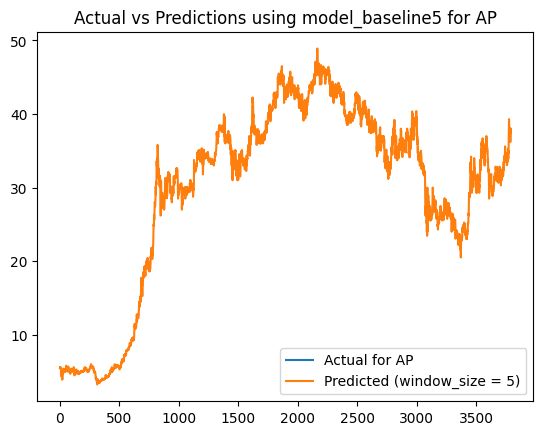

71/71 [==============================] - 0s 871us/step


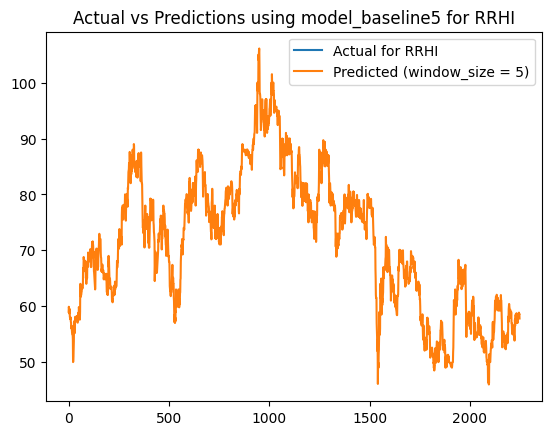

192/192 [==============================] - 0s 814us/step


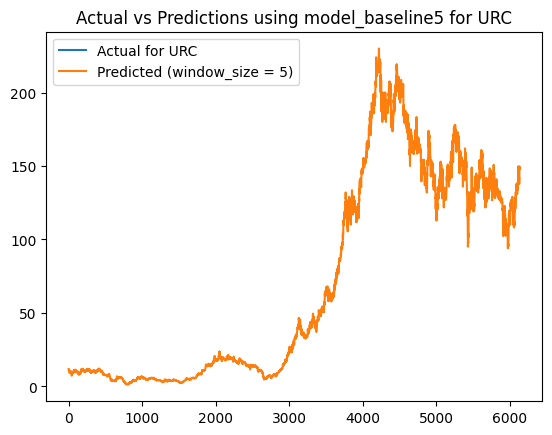

36/36 [==============================] - 0s 859us/step


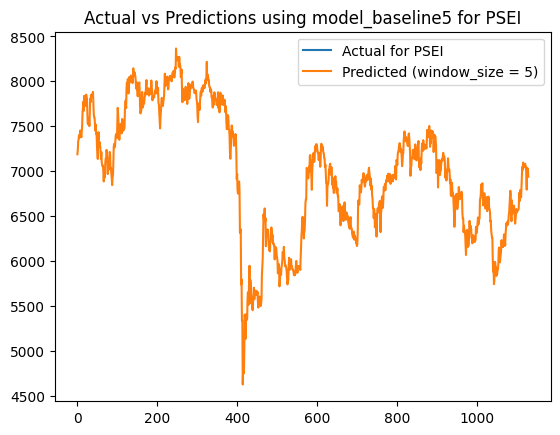

MSE        RMSE         MAE      MAPE
MEG        0.018313    0.135325    0.089492  0.044294
JGS        2.768986    1.664027    0.909163  0.039730
BDO        9.437182    3.072000    1.917591  0.027811
FGEN       0.697390    0.835099    0.589675  0.032448
ICT        8.045835    2.836518    1.446291  0.037191
ALI        0.888385    0.942542    0.612103  0.036227
SMC        9.741526    3.121142    1.633791  0.022563
TEL     4258.849135   65.259859   44.222306  0.029944
GLO     3485.906927   59.041569   36.289742  0.031107
BLOOM      6.424785    2.534716    0.707394  0.068089
RLC        0.474359    0.688738    0.446296  0.039557
MER       57.848398    7.605813    4.772978  0.037547
AC       334.590601   18.291818   12.152876  0.033888
PGOLD      2.051161    1.432188    1.053537  0.028003
LTG        0.579153    0.761021    0.456796  0.057317
MPI        0.045505    0.213320    0.142934  0.033725
AP         0.869319    0.932373    0.659027  0.025029
RRHI       6.239779    2.497955    1.873215  0.026766
URC       12.778593    3.574716    2.020788  0.037331
PSEI   31669.992904  177.960650  128.610517  0.019111

In [10]:
# Load the model_baseline5
model = tf.keras.models.load_model('exported_models/model_baseline5.keras')

# Initialize pandas dataframe for model_baseline5
len_symbols = len(stock_symbols)
df_model_baseline5 = pd.DataFrame({
    'MSE': [0 for _ in range(len_symbols)],
    'RMSE': [0 for _ in range(len_symbols)],
    'MAE': [0 for _ in range(len_symbols)],
    'MAPE': [0 for _ in range(len_symbols)]
}, index=[stock for stock in stock_symbols])

# Predict for all stocks using model_baseline5
for stock in stock_symbols:
    predictions = model.predict(X_stock_dict[stock][0])
    # Plot each one
    plt.plot(stock_dict[stock][0], label=f'Actual for {stock}')
    plt.plot(predictions, label='Predicted (window_size = 5)')
    plt.title(f"Actual vs Predictions using model_baseline5 for {stock}")
    plt.legend()
    plt.show()

    len_predictions = len(predictions)
    df_model_baseline5.loc[stock, 'MSE'] = mean_squared_error(stock_dict[stock][5:], predictions)
    df_model_baseline5.loc[stock, 'RMSE'] = sqrt(mean_squared_error(stock_dict[stock][5:], predictions))
    df_model_baseline5.loc[stock, 'MAE']= mean_absolute_error(stock_dict[stock][5:], predictions)
    df_model_baseline5.loc[stock, 'MAPE'] = mean_absolute_percentage_error(stock_dict[stock][5:], predictions)

df_model_baseline5

211/211 [==============================] - 0s 840us/step


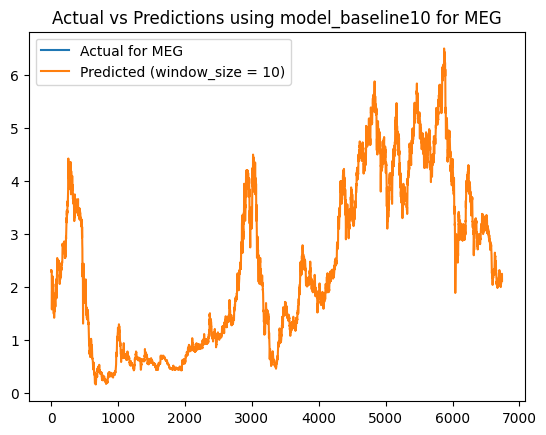

204/204 [==============================] - 0s 808us/step


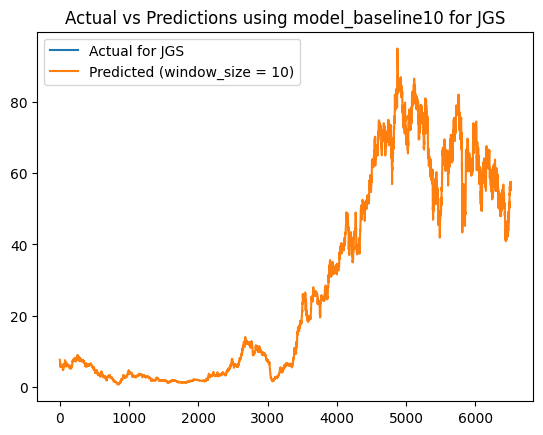

158/158 [==============================] - 0s 813us/step


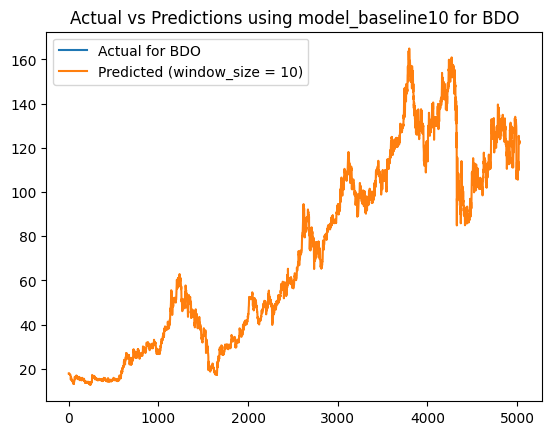

130/130 [==============================] - 0s 862us/step


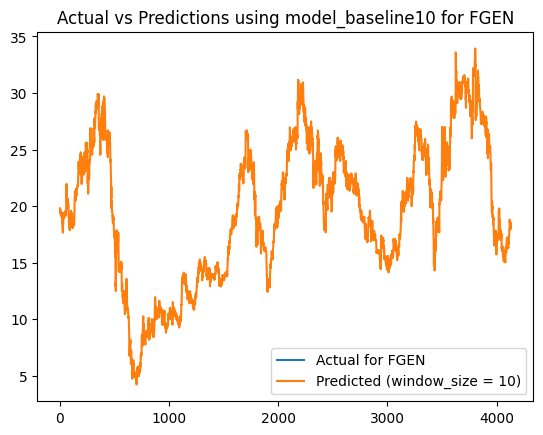

213/213 [==============================] - 0s 825us/step


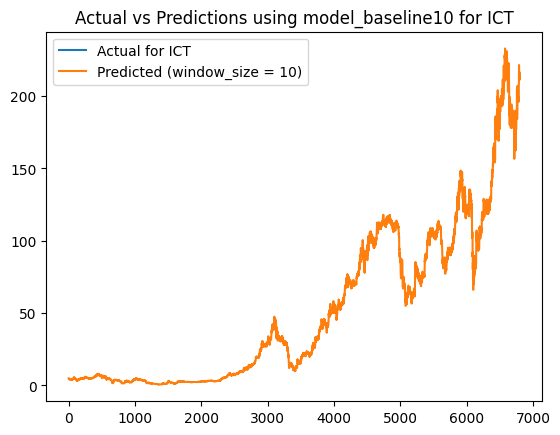

212/212 [==============================] - 0s 861us/step


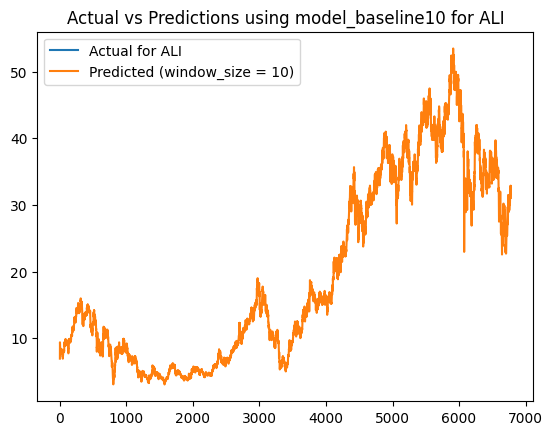

213/213 [==============================] - 0s 833us/step


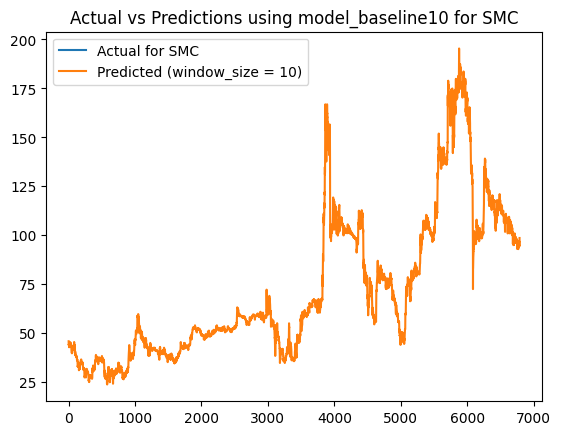

213/213 [==============================] - 0s 814us/step


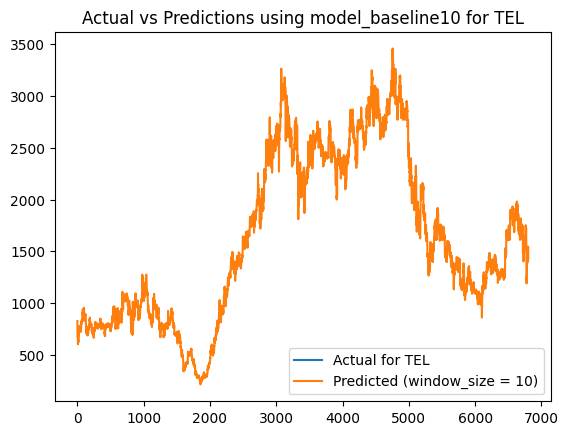

210/210 [==============================] - 0s 831us/step


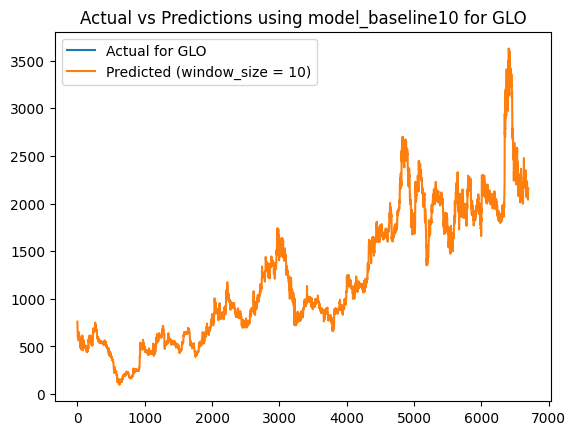

95/95 [==============================] - 0s 1ms/step


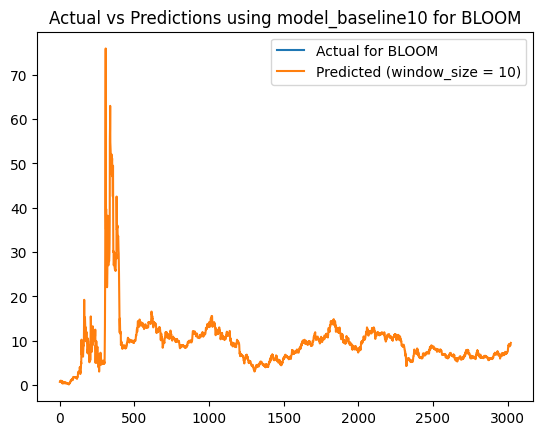

184/184 [==============================] - 0s 845us/step


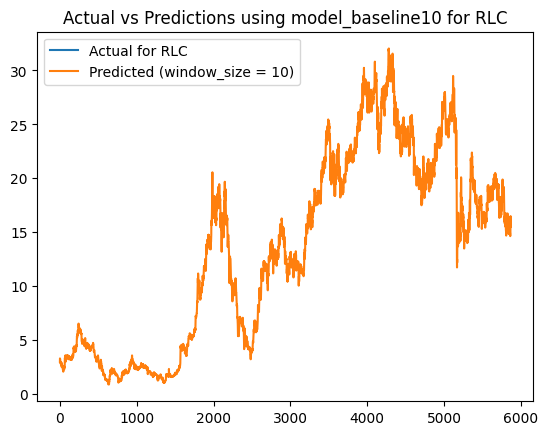

213/213 [==============================] - 0s 1ms/step


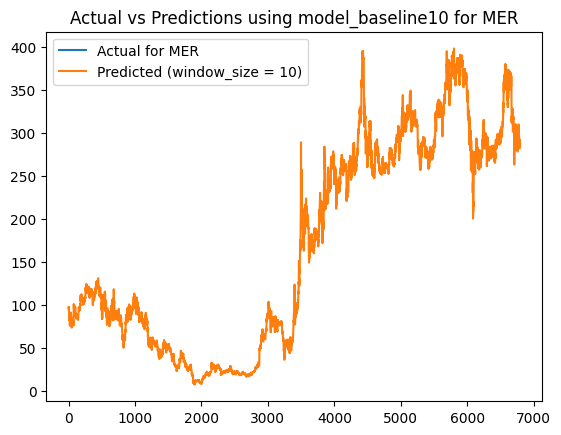

213/213 [==============================] - 0s 926us/step


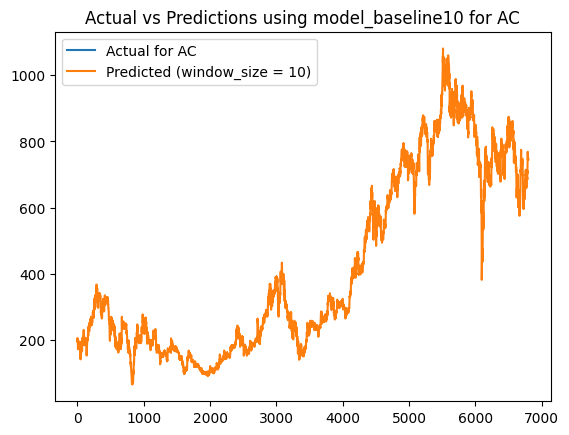

86/86 [==============================] - 0s 918us/step


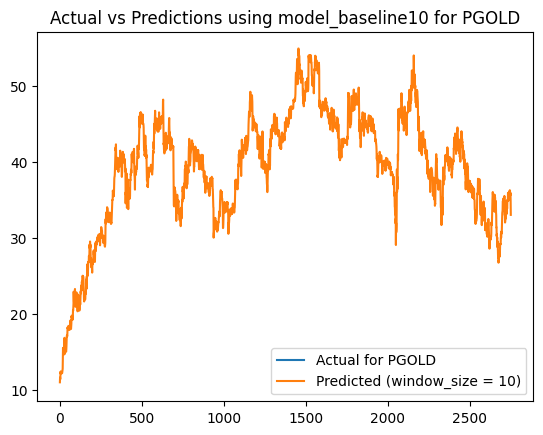

118/118 [==============================] - 0s 846us/step


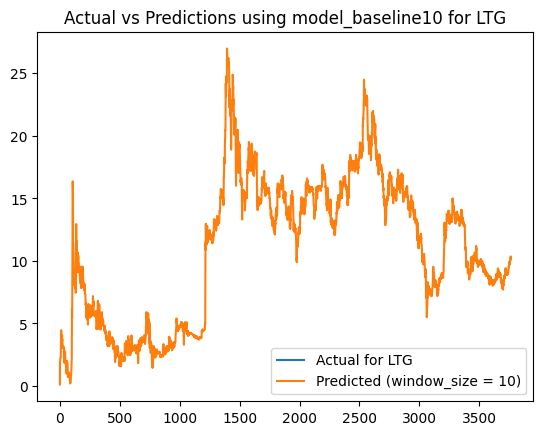

122/122 [==============================] - 0s 951us/step


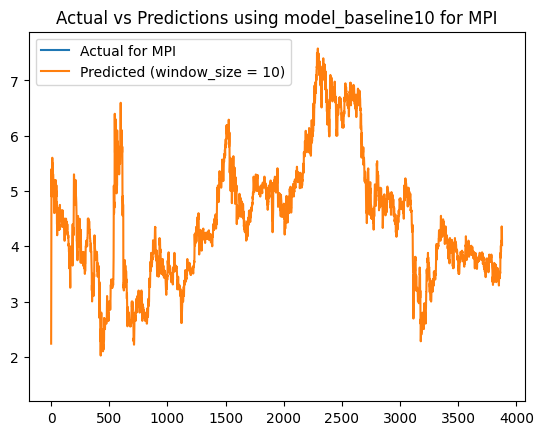

119/119 [==============================] - 0s 1ms/step


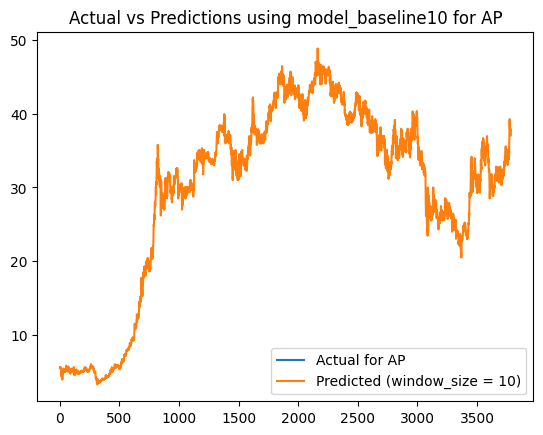

71/71 [==============================] - 0s 1ms/step


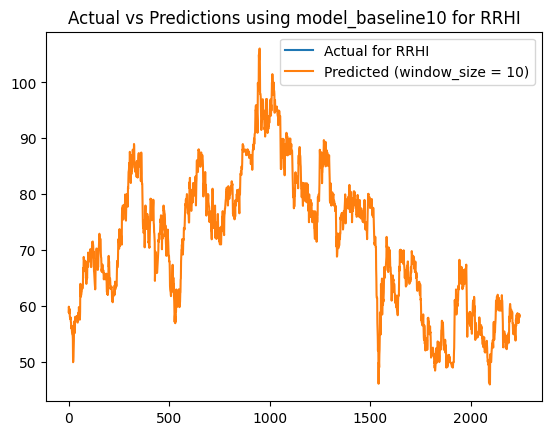

192/192 [==============================] - 0s 891us/step


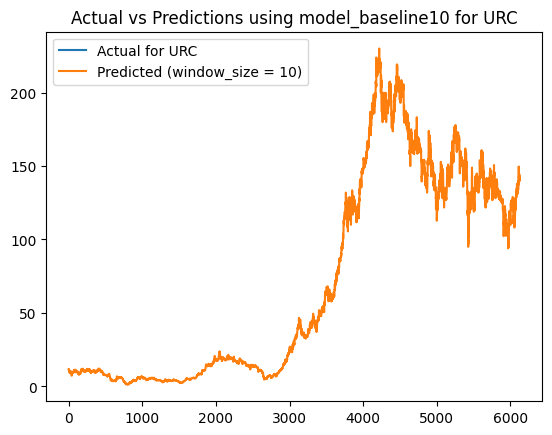

36/36 [==============================] - 0s 2ms/step


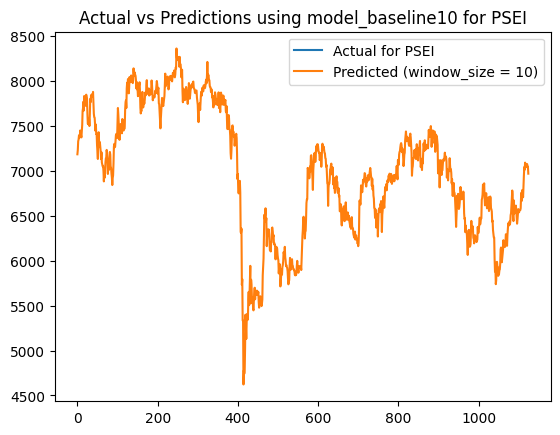

MSE        RMSE         MAE      MAPE
MEG        0.038743    0.196832    0.133113  0.067712
JGS        5.758506    2.399689    1.330459  0.061102
BDO       17.968679    4.238948    2.739392  0.040746
FGEN       1.467573    1.211434    0.885603  0.048847
ICT       14.815927    3.849146    2.038965  0.056812
ALI        1.739626    1.318949    0.868524  0.053020
SMC       22.629526    4.757050    2.556036  0.035645
TEL     8785.225750   93.729535   65.713891  0.044511
GLO     7240.233038   85.089559   54.248805  0.046959
BLOOM     12.543885    3.541735    1.085614  0.100773
RLC        0.961616    0.980620    0.641539  0.059413
MER      113.705760   10.663290    6.921830  0.055576
AC       660.336444   25.697012   17.461015  0.049368
PGOLD      4.219702    2.054191    1.532050  0.040872
LTG        1.341146    1.158079    0.702883  0.085724
MPI        0.092119    0.303512    0.207166  0.049380
AP         1.651456    1.285090    0.929846  0.035987
RRHI      12.908057    3.592778    2.717070  0.039175
URC       24.702543    4.970165    2.877177  0.057038
PSEI   75208.206718  274.241147  189.899826  0.028420

In [11]:
# Load the model_baseline10
model = tf.keras.models.load_model('exported_models/model_baseline10.keras')

# Initialize pandas dataframe for model_baseline10
len_symbols = len(stock_symbols)
df_model_baseline10 = pd.DataFrame({
    'MSE': [0 for _ in range(len_symbols)],
    'RMSE': [0 for _ in range(len_symbols)],
    'MAE': [0 for _ in range(len_symbols)],
    'MAPE': [0 for _ in range(len_symbols)]
}, index=[stock for stock in stock_symbols])

# Predict for all stocks using model_baseline10
for stock in stock_symbols:
    predictions = model.predict(X_stock_dict[stock][1])
    # Plot each one
    plt.plot(stock_dict[stock][0], label=f'Actual for {stock}')
    plt.plot(predictions, label='Predicted (window_size = 10)')
    plt.title(f"Actual vs Predictions using model_baseline10 for {stock}")
    plt.legend()
    plt.show()

    len_predictions = len(predictions)
    df_model_baseline10.loc[stock, 'MSE'] = mean_squared_error(stock_dict[stock][10:], predictions)
    df_model_baseline10.loc[stock, 'RMSE'] = sqrt(mean_squared_error(stock_dict[stock][10:], predictions))
    df_model_baseline10.loc[stock, 'MAE']= mean_absolute_error(stock_dict[stock][10:], predictions)
    df_model_baseline10.loc[stock, 'MAPE'] = mean_absolute_percentage_error(stock_dict[stock][10:], predictions)

df_model_baseline10

211/211 [==============================] - 0s 905us/step


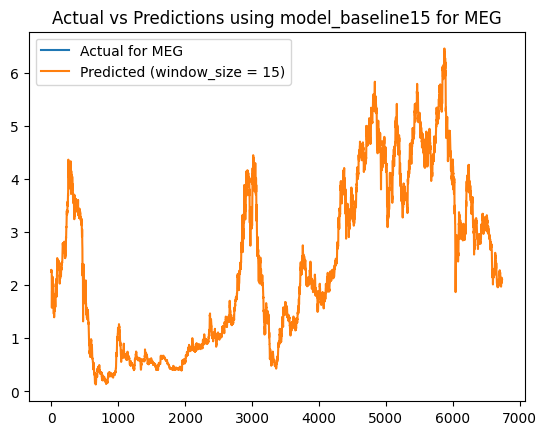

204/204 [==============================] - 0s 1ms/step


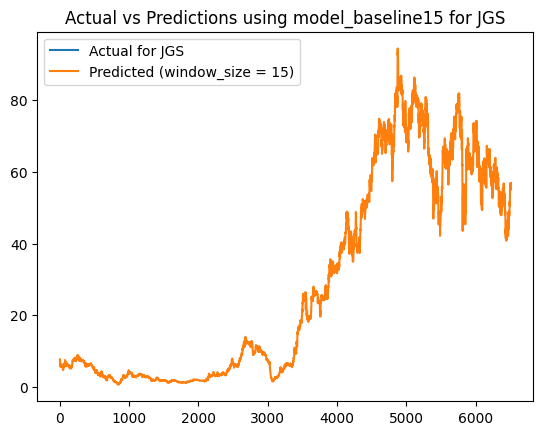

158/158 [==============================] - 0s 1ms/step


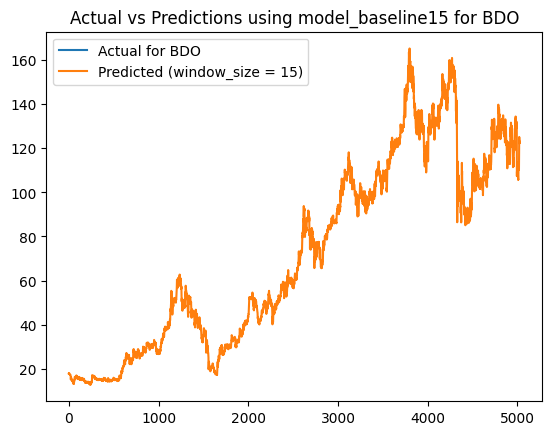

129/129 [==============================] - 0s 969us/step


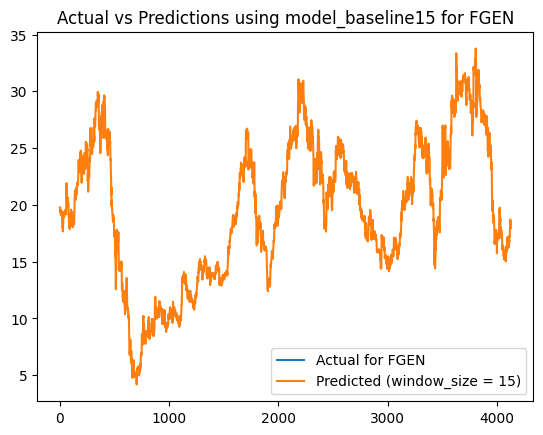

213/213 [==============================] - 0s 1ms/step


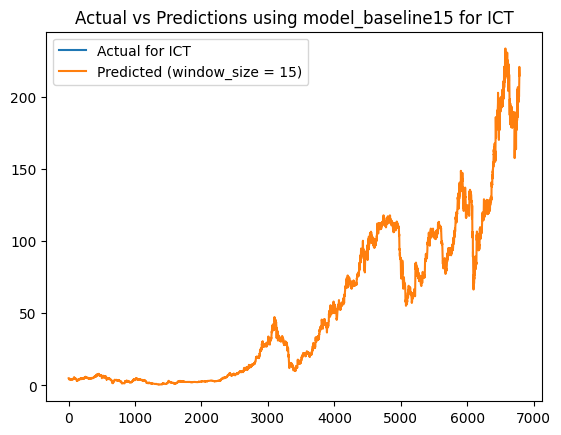

212/212 [==============================] - 0s 1ms/step


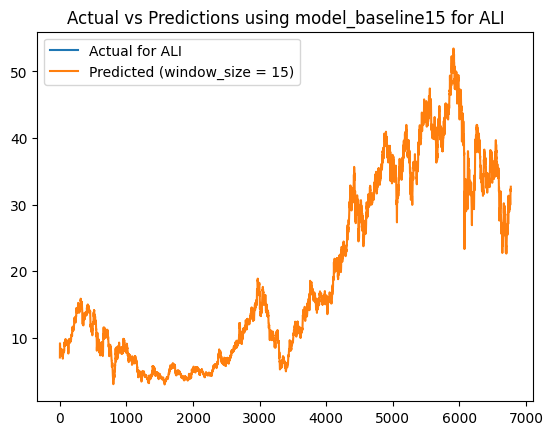

212/212 [==============================] - 0s 2ms/step


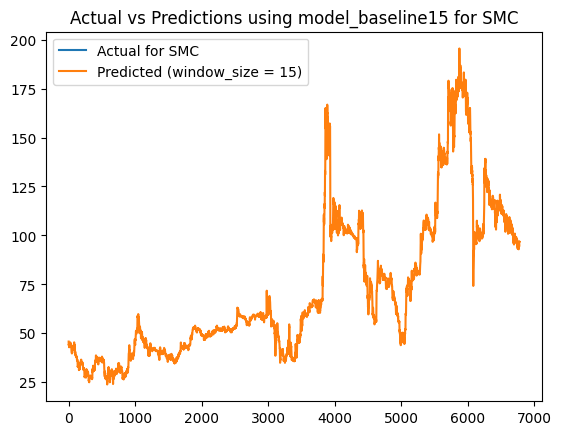

213/213 [==============================] - 0s 874us/step


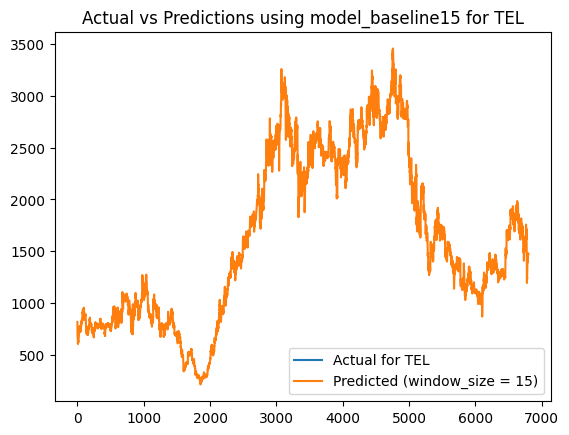

210/210 [==============================] - 0s 908us/step


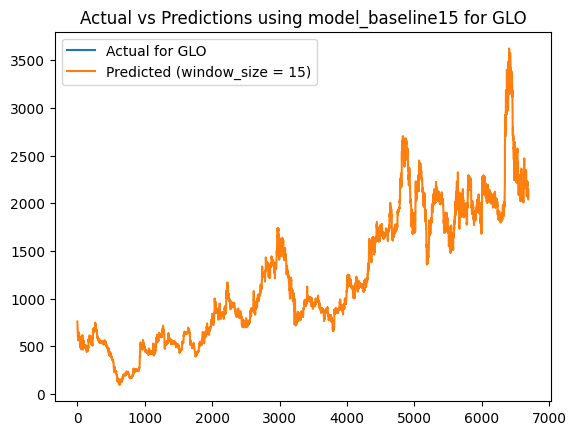

95/95 [==============================] - 0s 1ms/step


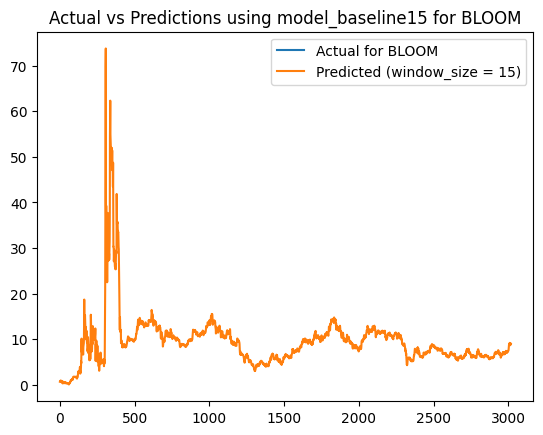

184/184 [==============================] - 0s 890us/step


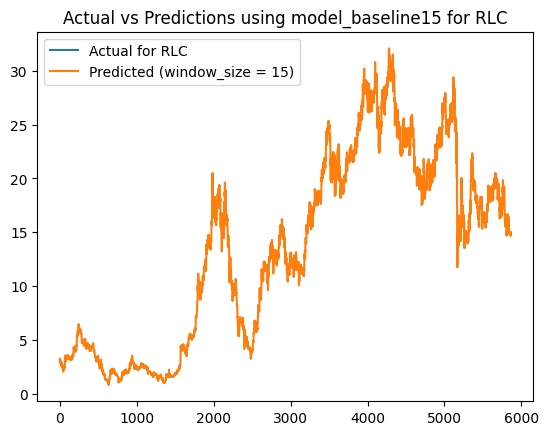

212/212 [==============================] - 0s 1ms/step


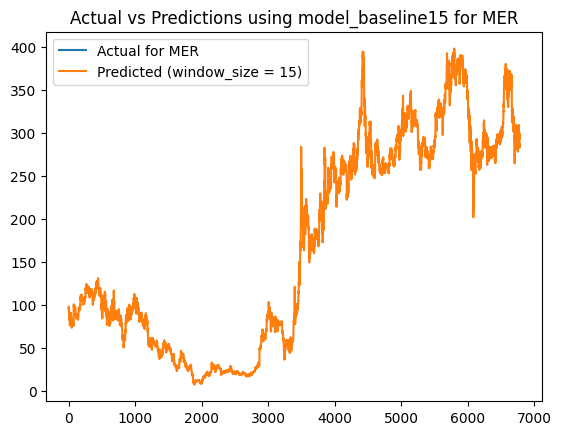

213/213 [==============================] - 0s 936us/step


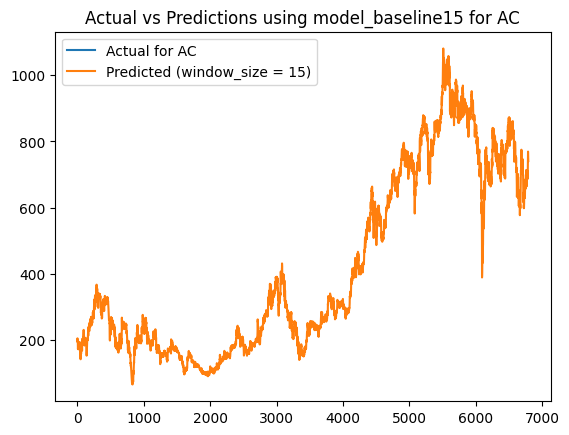

86/86 [==============================] - 0s 997us/step


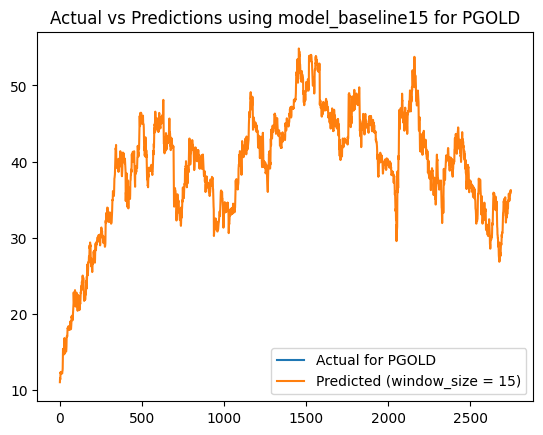

118/118 [==============================] - 0s 874us/step


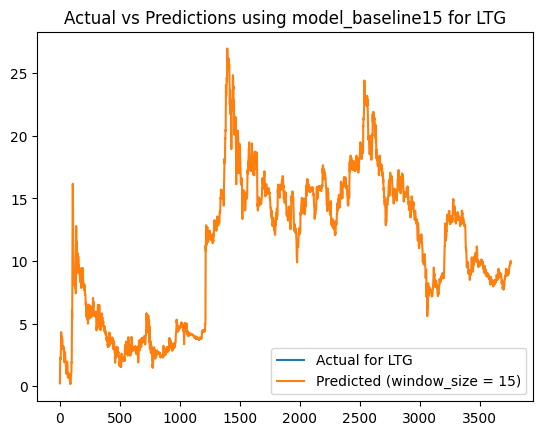

122/122 [==============================] - 0s 930us/step


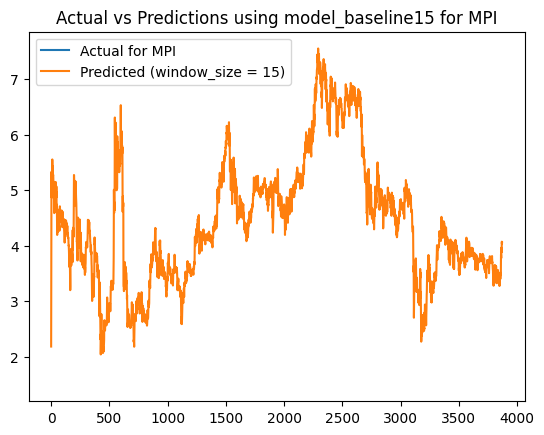

119/119 [==============================] - 0s 952us/step


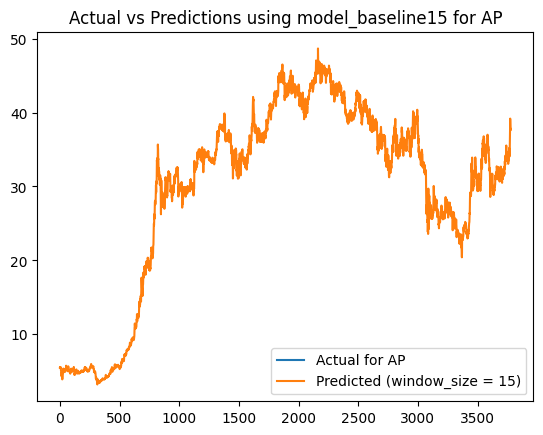

70/70 [==============================] - 0s 838us/step


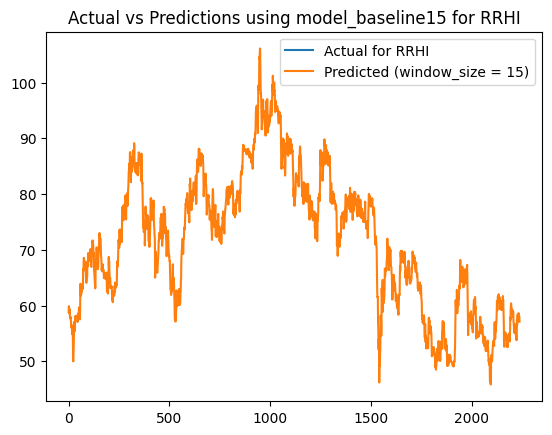

192/192 [==============================] - 0s 986us/step


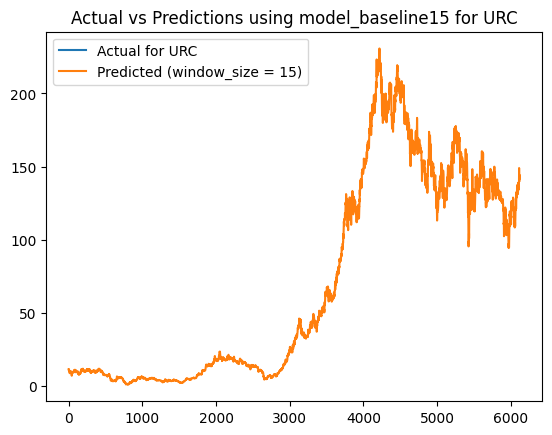

35/35 [==============================] - 0s 1ms/step


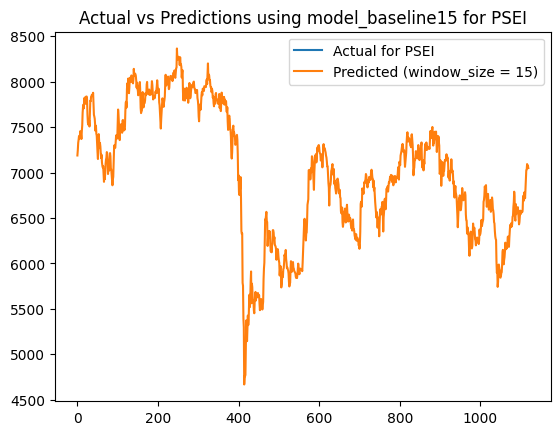

MSE        RMSE         MAE      MAPE
MEG         0.060459    0.245885    0.171307  0.089346
JGS         8.401938    2.898610    1.646894  0.078230
BDO        26.026982    5.101665    3.343582  0.050520
FGEN        2.212359    1.487400    1.116220  0.061673
ICT        22.448635    4.737999    2.529287  0.073059
ALI         2.514781    1.585806    1.075799  0.066385
SMC        36.380946    6.031662    3.285801  0.045641
TEL     12414.766347  111.421570   80.476986  0.055122
GLO     10574.844283  102.834062   65.715352  0.058159
BLOOM      15.519378    3.939464    1.356815  0.126470
RLC         1.408281    1.186710    0.794952  0.074977
MER       176.800740   13.296644    8.700512  0.070309
AC        973.942951   31.208059   21.398578  0.061340
PGOLD       6.390933    2.528029    1.901643  0.050704
LTG         2.045159    1.430091    0.875329  0.102722
MPI         0.137443    0.370733    0.254529  0.060682
AP          2.430489    1.559003    1.119990  0.044126
RRHI       18.813920    4.337502    3.313158  0.048053
URC        34.936944    5.910748    3.484516  0.072250
PSEI   120327.985859  346.883245  238.940134  0.035936

In [12]:
# Load the model_baseline15
model = tf.keras.models.load_model('exported_models/model_baseline15.keras')

# Initialize pandas dataframe for model_baseline15
len_symbols = len(stock_symbols)
df_model_baseline15 = pd.DataFrame({
    'MSE': [0 for _ in range(len_symbols)],
    'RMSE': [0 for _ in range(len_symbols)],
    'MAE': [0 for _ in range(len_symbols)],
    'MAPE': [0 for _ in range(len_symbols)]
}, index=[stock for stock in stock_symbols])

# Predict for all stocks using model_baseline15
for stock in stock_symbols:
    predictions = model.predict(X_stock_dict[stock][2])
    # Plot each one
    plt.plot(stock_dict[stock][0], label=f'Actual for {stock}')
    plt.plot(predictions, label='Predicted (window_size = 15)')
    plt.title(f"Actual vs Predictions using model_baseline15 for {stock}")
    plt.legend()
    plt.show()

    len_predictions = len(predictions)
    df_model_baseline15.loc[stock, 'MSE'] = mean_squared_error(stock_dict[stock][15:], predictions)
    df_model_baseline15.loc[stock, 'RMSE'] = sqrt(mean_squared_error(stock_dict[stock][15:], predictions))
    df_model_baseline15.loc[stock, 'MAE']= mean_absolute_error(stock_dict[stock][15:], predictions)
    df_model_baseline15.loc[stock, 'MAPE'] = mean_absolute_percentage_error(stock_dict[stock][15:], predictions)

df_model_baseline15

211/211 [==============================] - 0s 854us/step


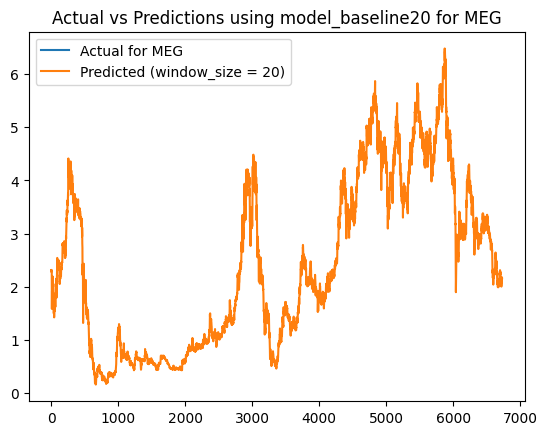

204/204 [==============================] - 0s 839us/step


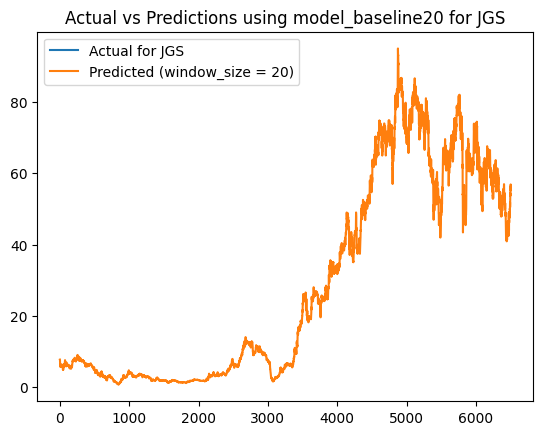

157/157 [==============================] - 0s 850us/step


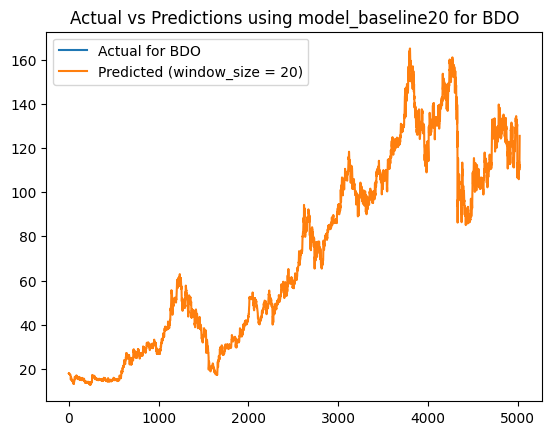

129/129 [==============================] - 0s 814us/step


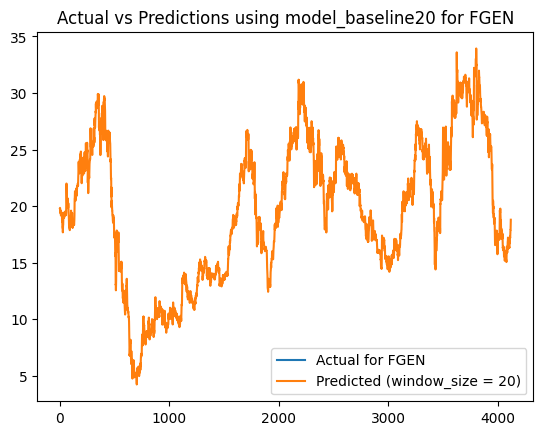

213/213 [==============================] - 0s 1ms/step


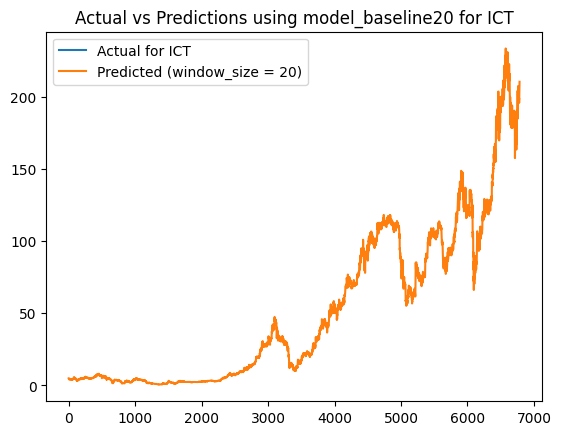

212/212 [==============================] - 0s 802us/step


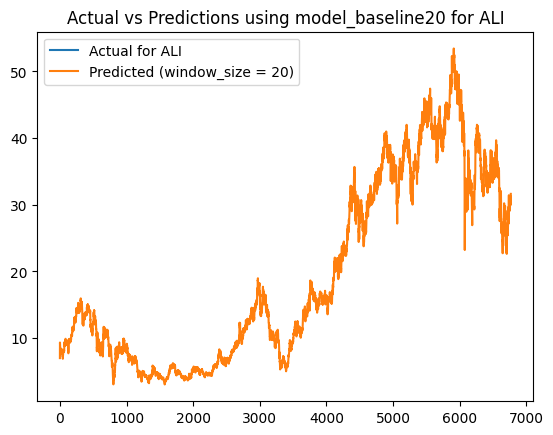

212/212 [==============================] - 0s 1ms/step


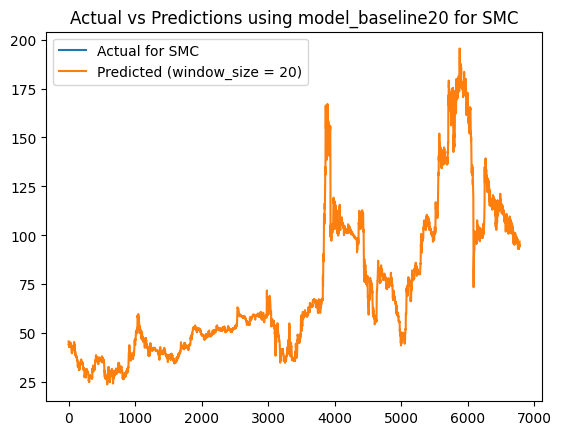

213/213 [==============================] - 0s 907us/step


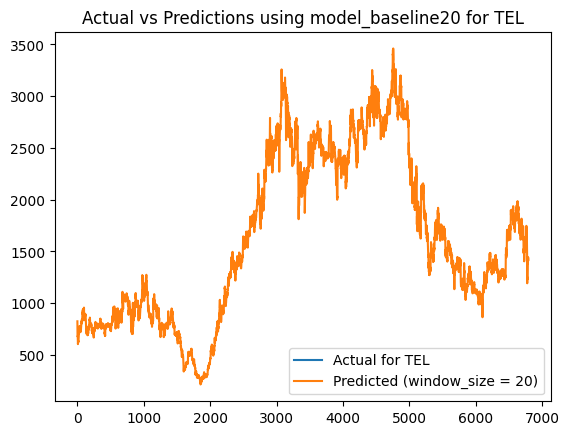

209/209 [==============================] - 0s 810us/step


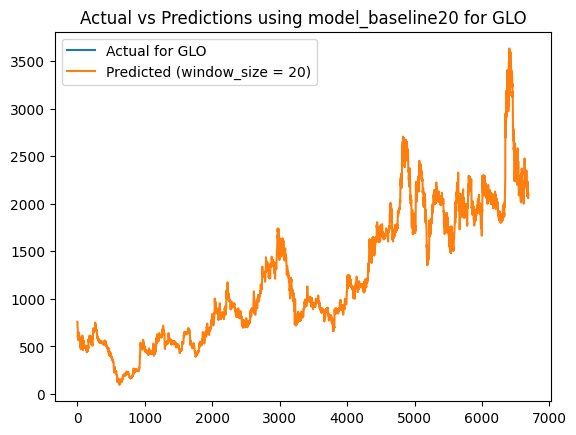

95/95 [==============================] - 0s 875us/step


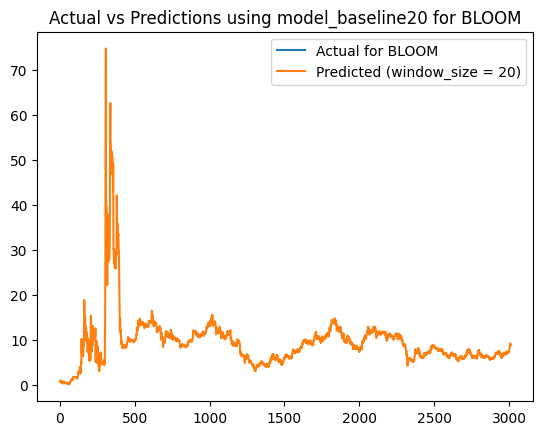

184/184 [==============================] - 0s 860us/step


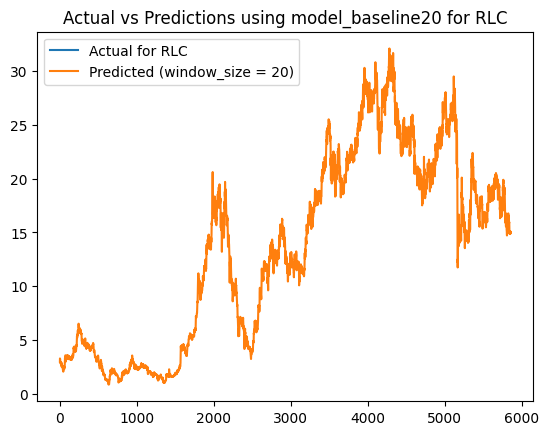

212/212 [==============================] - 0s 826us/step


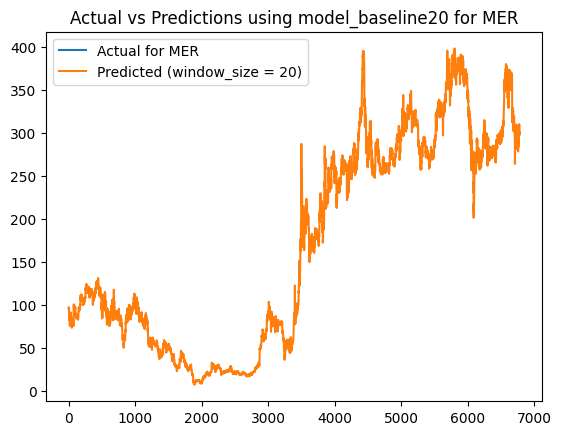

213/213 [==============================] - 0s 831us/step


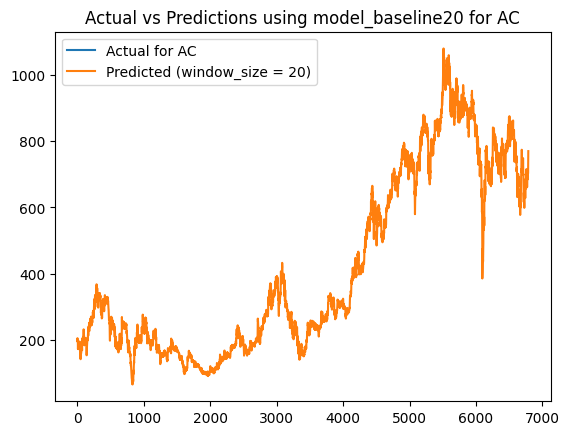

86/86 [==============================] - 0s 1ms/step


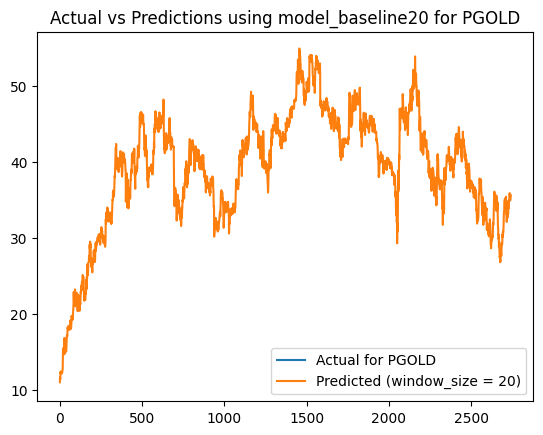

118/118 [==============================] - 0s 891us/step


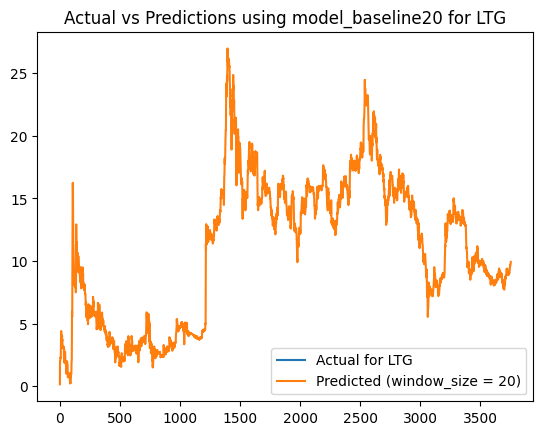

121/121 [==============================] - 0s 869us/step


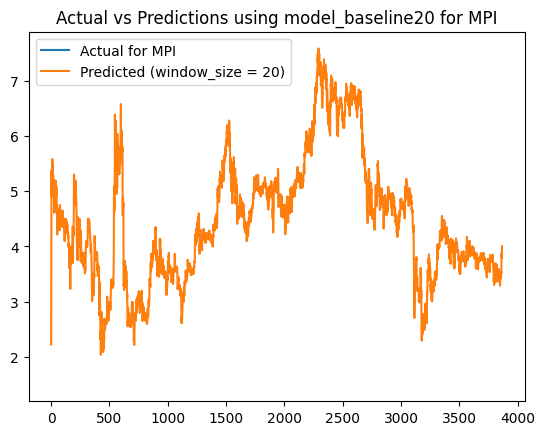

118/118 [==============================] - 0s 1ms/step


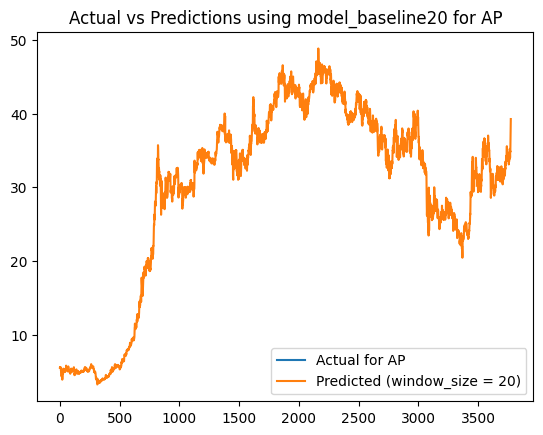

70/70 [==============================] - 0s 892us/step


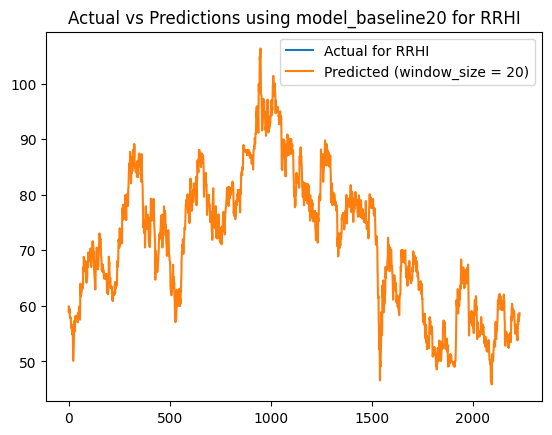

192/192 [==============================] - 0s 1ms/step


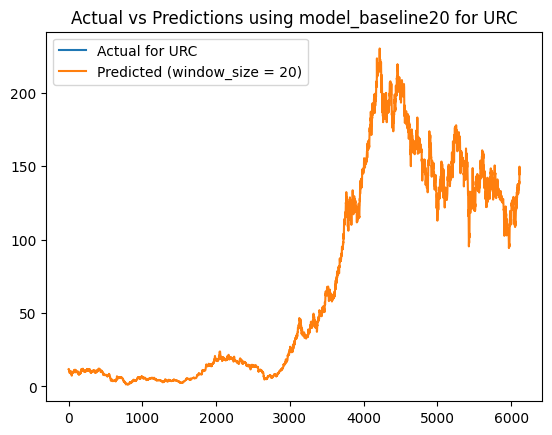

35/35 [==============================] - 0s 1ms/step


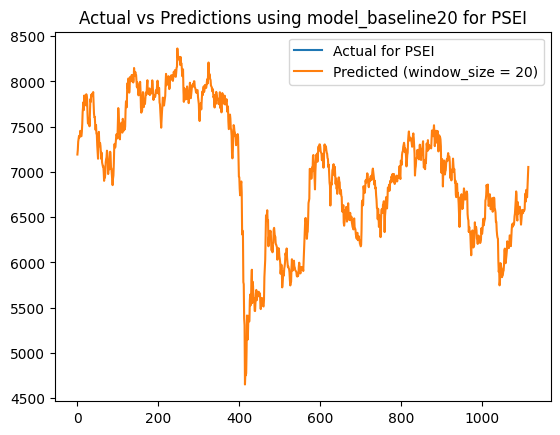

MSE        RMSE         MAE      MAPE
MEG         0.081803    0.286012    0.198636  0.104414
JGS        11.066751    3.326673    1.921637  0.094598
BDO        34.820280    5.900871    3.873215  0.059290
FGEN        2.967630    1.722681    1.309110  0.072748
ICT        30.893950    5.558233    3.003281  0.088051
ALI         3.302952    1.817403    1.256158  0.078112
SMC        50.462005    7.103661    3.943953  0.054555
TEL     16132.938714  127.015506   93.908839  0.064949
GLO     14463.298565  120.263455   76.629963  0.068662
BLOOM      20.559990    4.534313    1.646315  0.154700
RLC         1.892766    1.375778    0.932825  0.089187
MER       232.161681   15.236853   10.127481  0.082655
AC       1326.555630   36.421911   24.934573  0.072145
PGOLD       8.584493    2.929931    2.247238  0.059729
LTG         2.755235    1.659890    1.040103  0.120721
MPI         0.180203    0.424503    0.293214  0.070361
AP          3.203753    1.789903    1.283442  0.050556
RRHI       25.181649    5.018132    3.903470  0.056581
URC        45.872622    6.772933    4.088884  0.086871
PSEI   162215.613883  402.759995  280.641526  0.042357

In [13]:
# Load the model_baseline20
model = tf.keras.models.load_model('exported_models/model_baseline20.keras')

# Initialize pandas dataframe for model_baseline20
len_symbols = len(stock_symbols)
df_model_baseline20 = pd.DataFrame({
    'MSE': [0 for _ in range(len_symbols)],
    'RMSE': [0 for _ in range(len_symbols)],
    'MAE': [0 for _ in range(len_symbols)],
    'MAPE': [0 for _ in range(len_symbols)]
}, index=[stock for stock in stock_symbols])

# Predict for all stocks using model_baseline20
for stock in stock_symbols:
    predictions = model.predict(X_stock_dict[stock][3])
    # Plot each one
    plt.plot(stock_dict[stock][0], label=f'Actual for {stock}')
    plt.plot(predictions, label='Predicted (window_size = 20)')
    plt.title(f"Actual vs Predictions using model_baseline20 for {stock}")
    plt.legend()
    plt.show()

    len_predictions = len(predictions)
    df_model_baseline20.loc[stock, 'MSE'] = mean_squared_error(stock_dict[stock][20:], predictions)
    df_model_baseline20.loc[stock, 'RMSE'] = sqrt(mean_squared_error(stock_dict[stock][20:], predictions))
    df_model_baseline20.loc[stock, 'MAE']= mean_absolute_error(stock_dict[stock][20:], predictions)
    df_model_baseline20.loc[stock, 'MAPE'] = mean_absolute_percentage_error(stock_dict[stock][20:], predictions)

df_model_baseline20